In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')
from matplotlib.colors import ListedColormap

In [534]:
from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler

from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_predict,cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,cohen_kappa_score,\
roc_auc_score,roc_curve,precision_score

from sklearn.feature_selection import RFE

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier


from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

In [535]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 

In [536]:
df_healthcare = pd.read_csv('healthcare-dataset-stroke-data.csv')
df_healthcare.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [537]:
df_healthcare.shape

(5110, 12)

In [538]:
# There is 5110 and 10 columns

In [539]:
df_healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [540]:
df_healthcare.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [541]:
df_healthcare.isna().mean()

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [542]:
# There is null value present present for bmi

In [543]:
df_healthcare[df_healthcare.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [544]:
# There is no duplicate values

In [545]:
df_healthcare.drop(['id'],axis=1,inplace=True)

In [546]:
df_healthcare.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [547]:
knn_imputer = KNNImputer(n_neighbors=2)
fitted = knn_imputer.fit_transform(df_healthcare[['bmi']])
df_healthcare['bmi'] = fitted

In [548]:
# checking the unique value for categorical columns
# gender
df_healthcare['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [549]:
df_healthcare['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [550]:
df_healthcare['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [551]:
df_healthcare['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [552]:
df_healthcare['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [553]:
df_healthcare['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [554]:
df_healthcare['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [555]:
df_healthcare['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [556]:
df_healthcare.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [557]:
df_healthcare.skew()

age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.076716
stroke               4.193284
dtype: float64

In [558]:
# none of column is normally distributted.

In [559]:
df_healthcare.kurt()

age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
avg_glucose_level     1.680479
bmi                   3.623061
stroke               15.589736
dtype: float64

# visualization

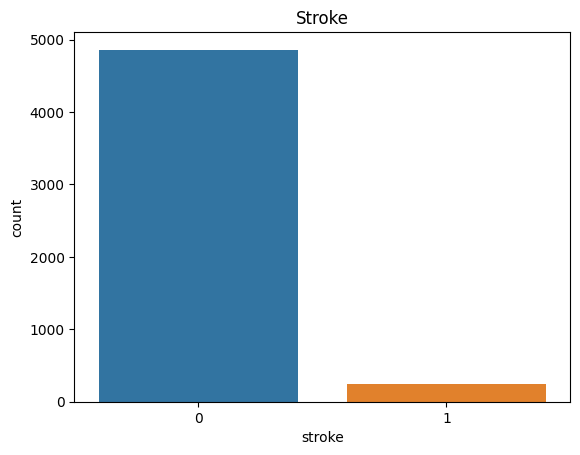

In [560]:
sns.countplot(data=df_healthcare,x='stroke')
plt.title('Stroke');

In [561]:
# We can see that there is huge imbalance for target column

In [562]:
# spliting numerical data and categorical data

df_healthcare_cat = df_healthcare.select_dtypes(include=np.object_)
df_healthcare_num = df_healthcare.select_dtypes(exclude=np.object_)

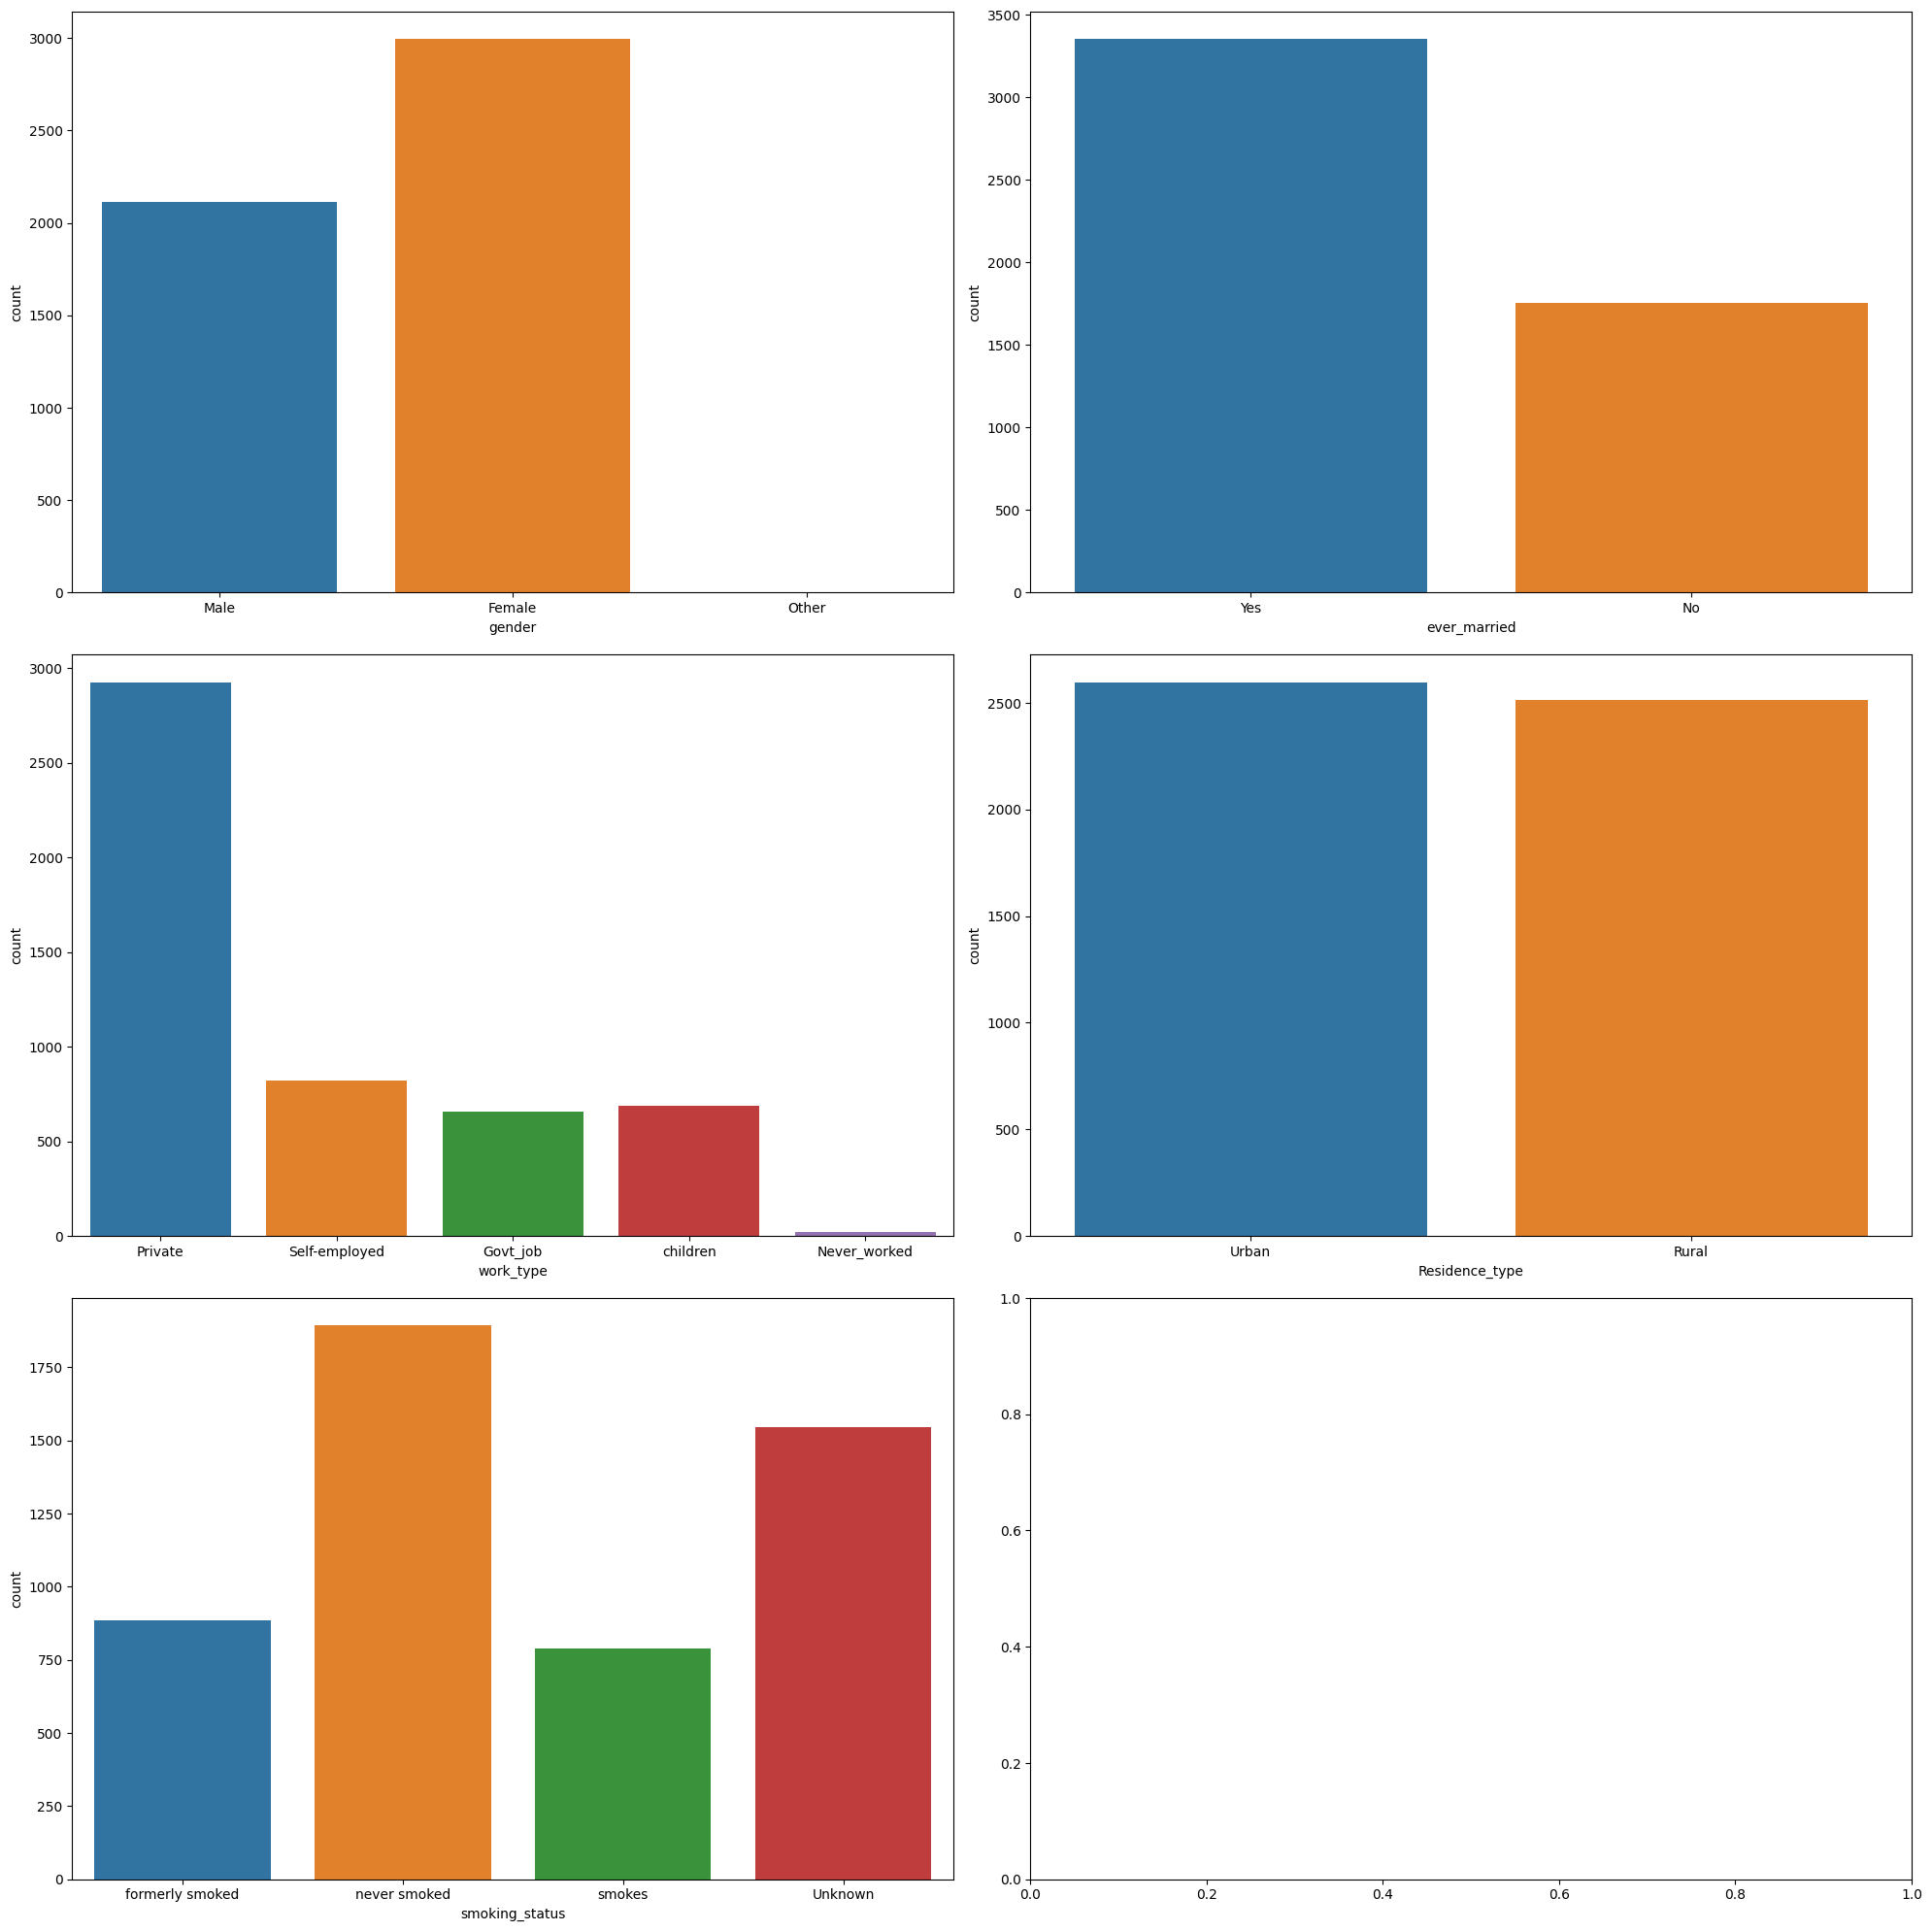

In [563]:
# For categorical columns
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
for x,y in zip(df_healthcare_cat.columns,ax.flatten()):
    sns.countplot(x=df_healthcare_cat[x],ax=y)
    
plt.tight_layout()
plt.show()

In [564]:
# Other categorical are fairly balanced except gender and work_type
df_healthcare_cat['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [565]:
df_healthcare_cat['work_type'].replace({'Never_worked':'children'},inplace=True)
# Replacing 'Never_worked' value in work_type column to 'children' 
# since children normally don't work.

In [566]:
df_healthcare_cat['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [567]:
df_healthcare_cat['gender'].replace({'Other':'Female'},inplace=True)
# Replacing other value in gender column to female since there is more number of female records in the gender column

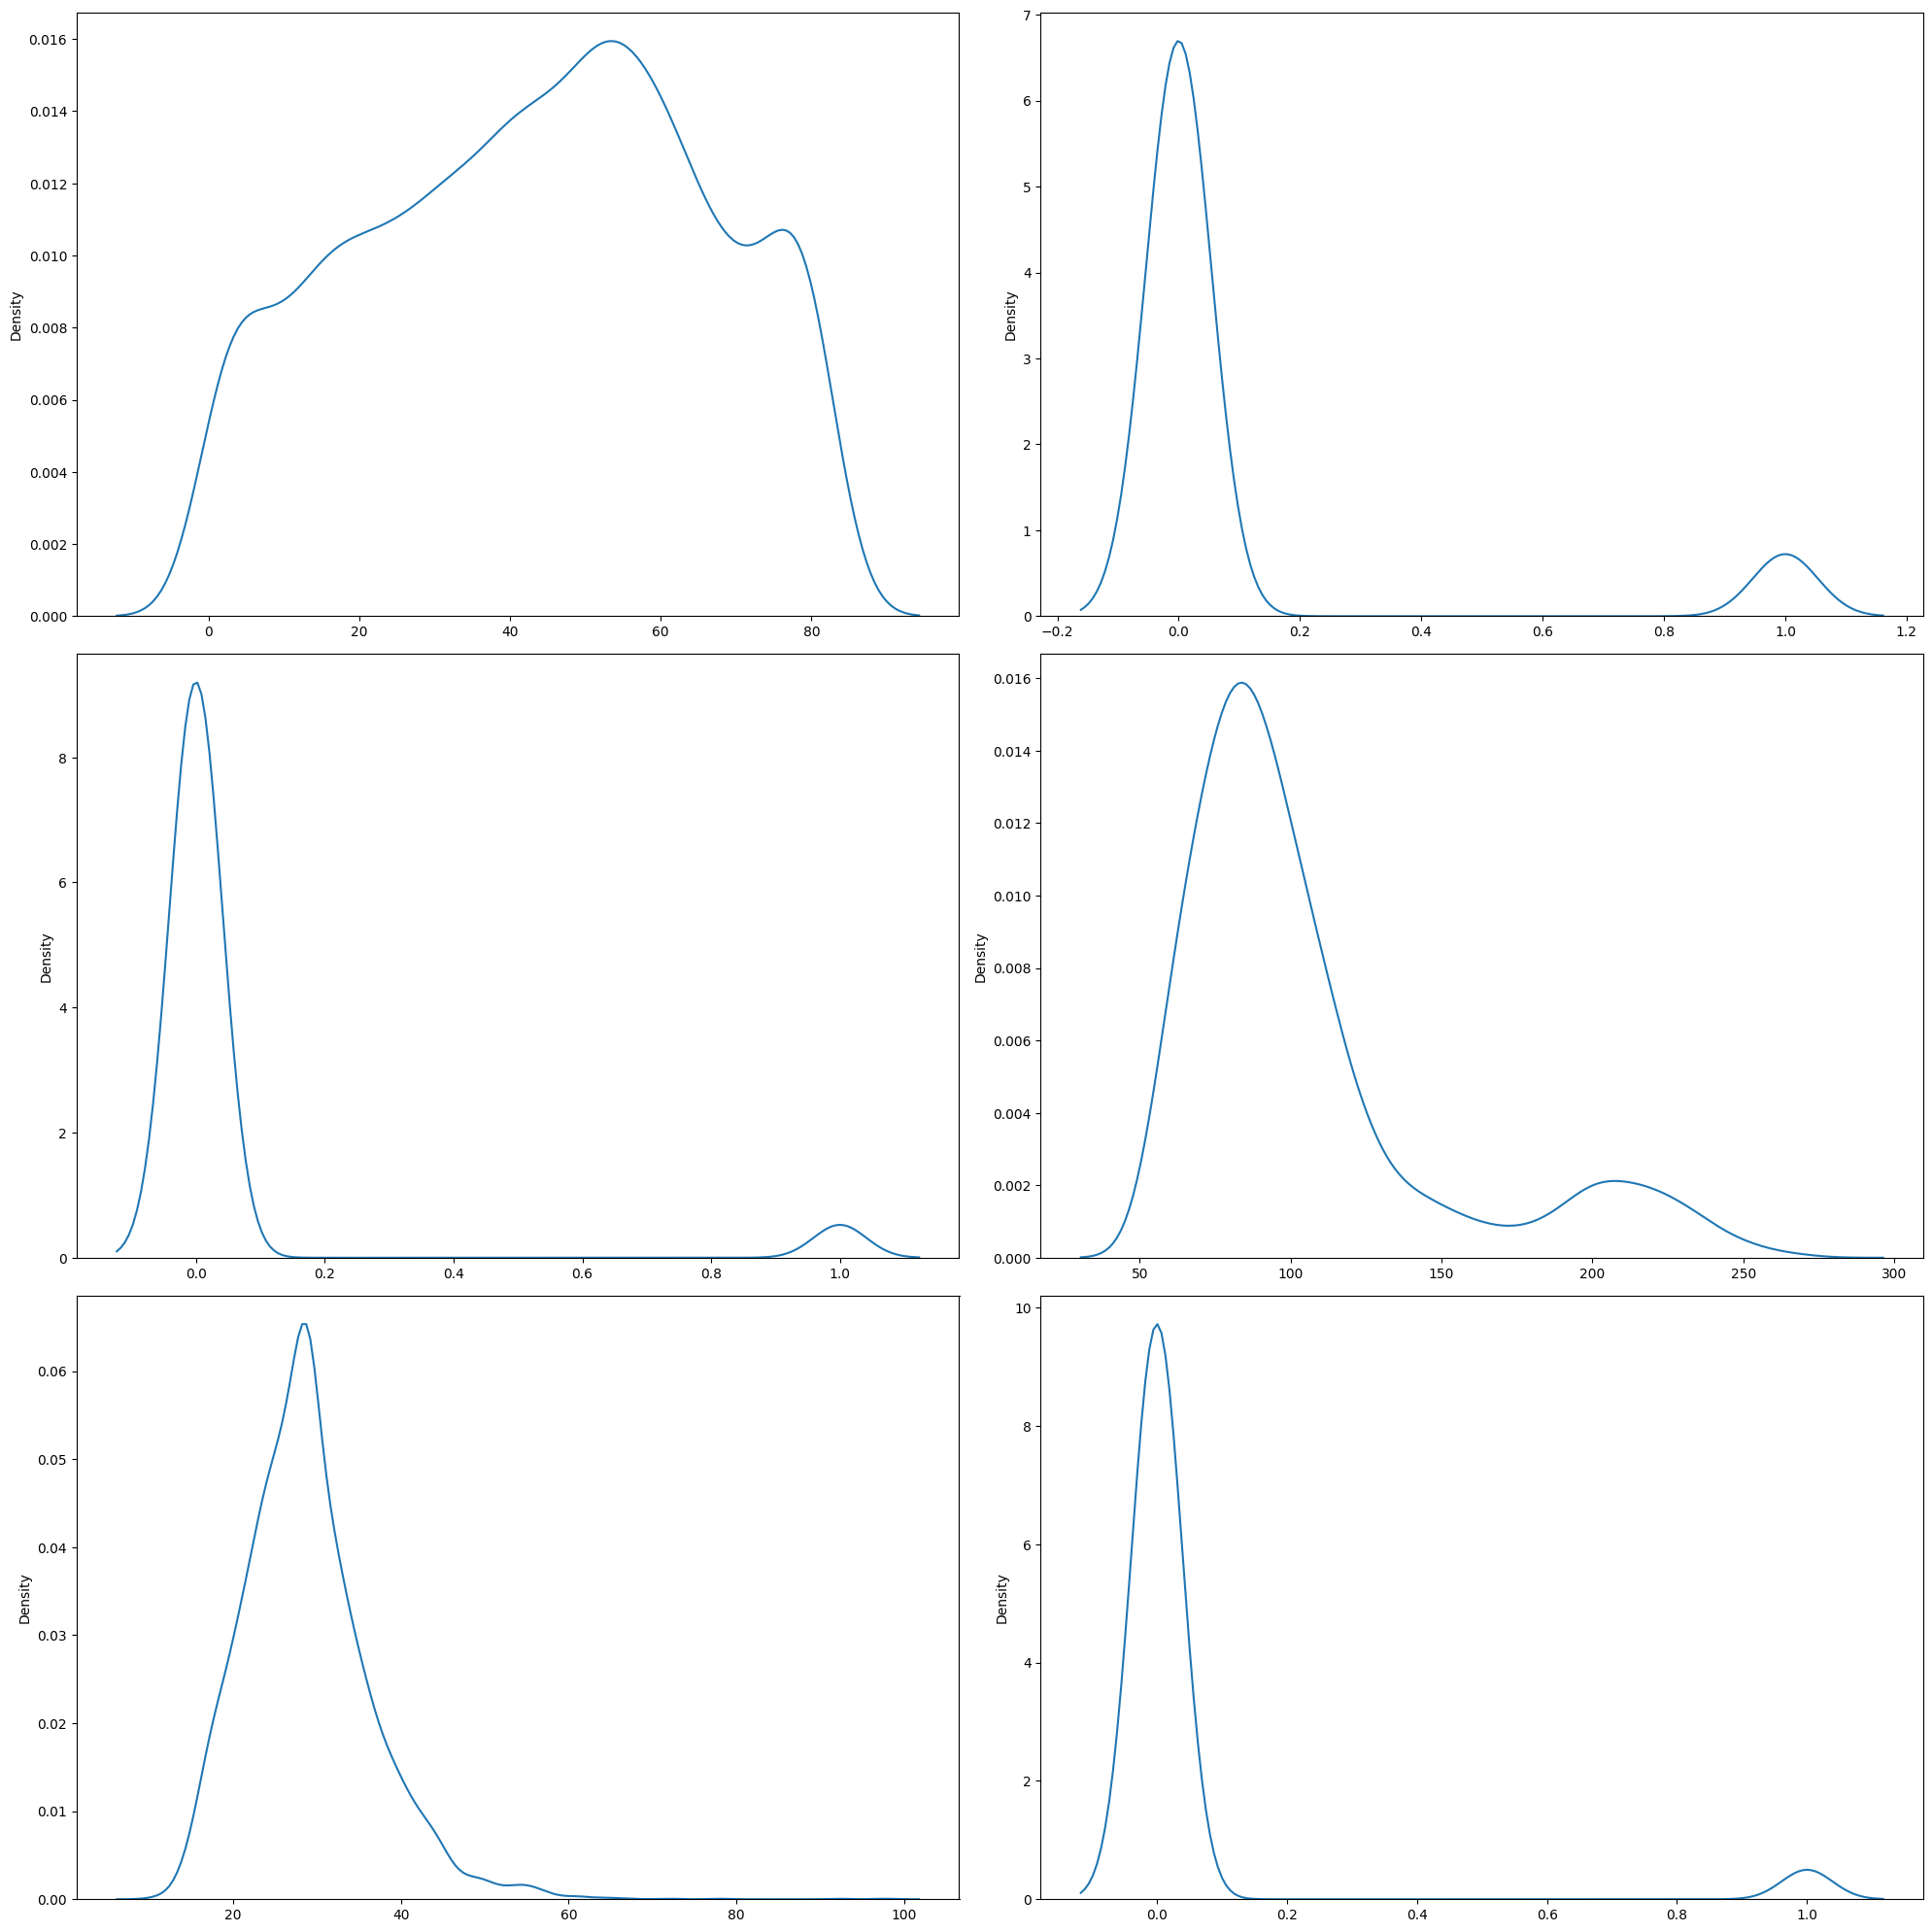

In [568]:
# For numerical columns
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
for x,y in zip(df_healthcare_num.columns,ax.flatten()):
    sns.distplot(x=df_healthcare_num[x],ax=y,hist=False)
    
plt.tight_layout()
plt.show()

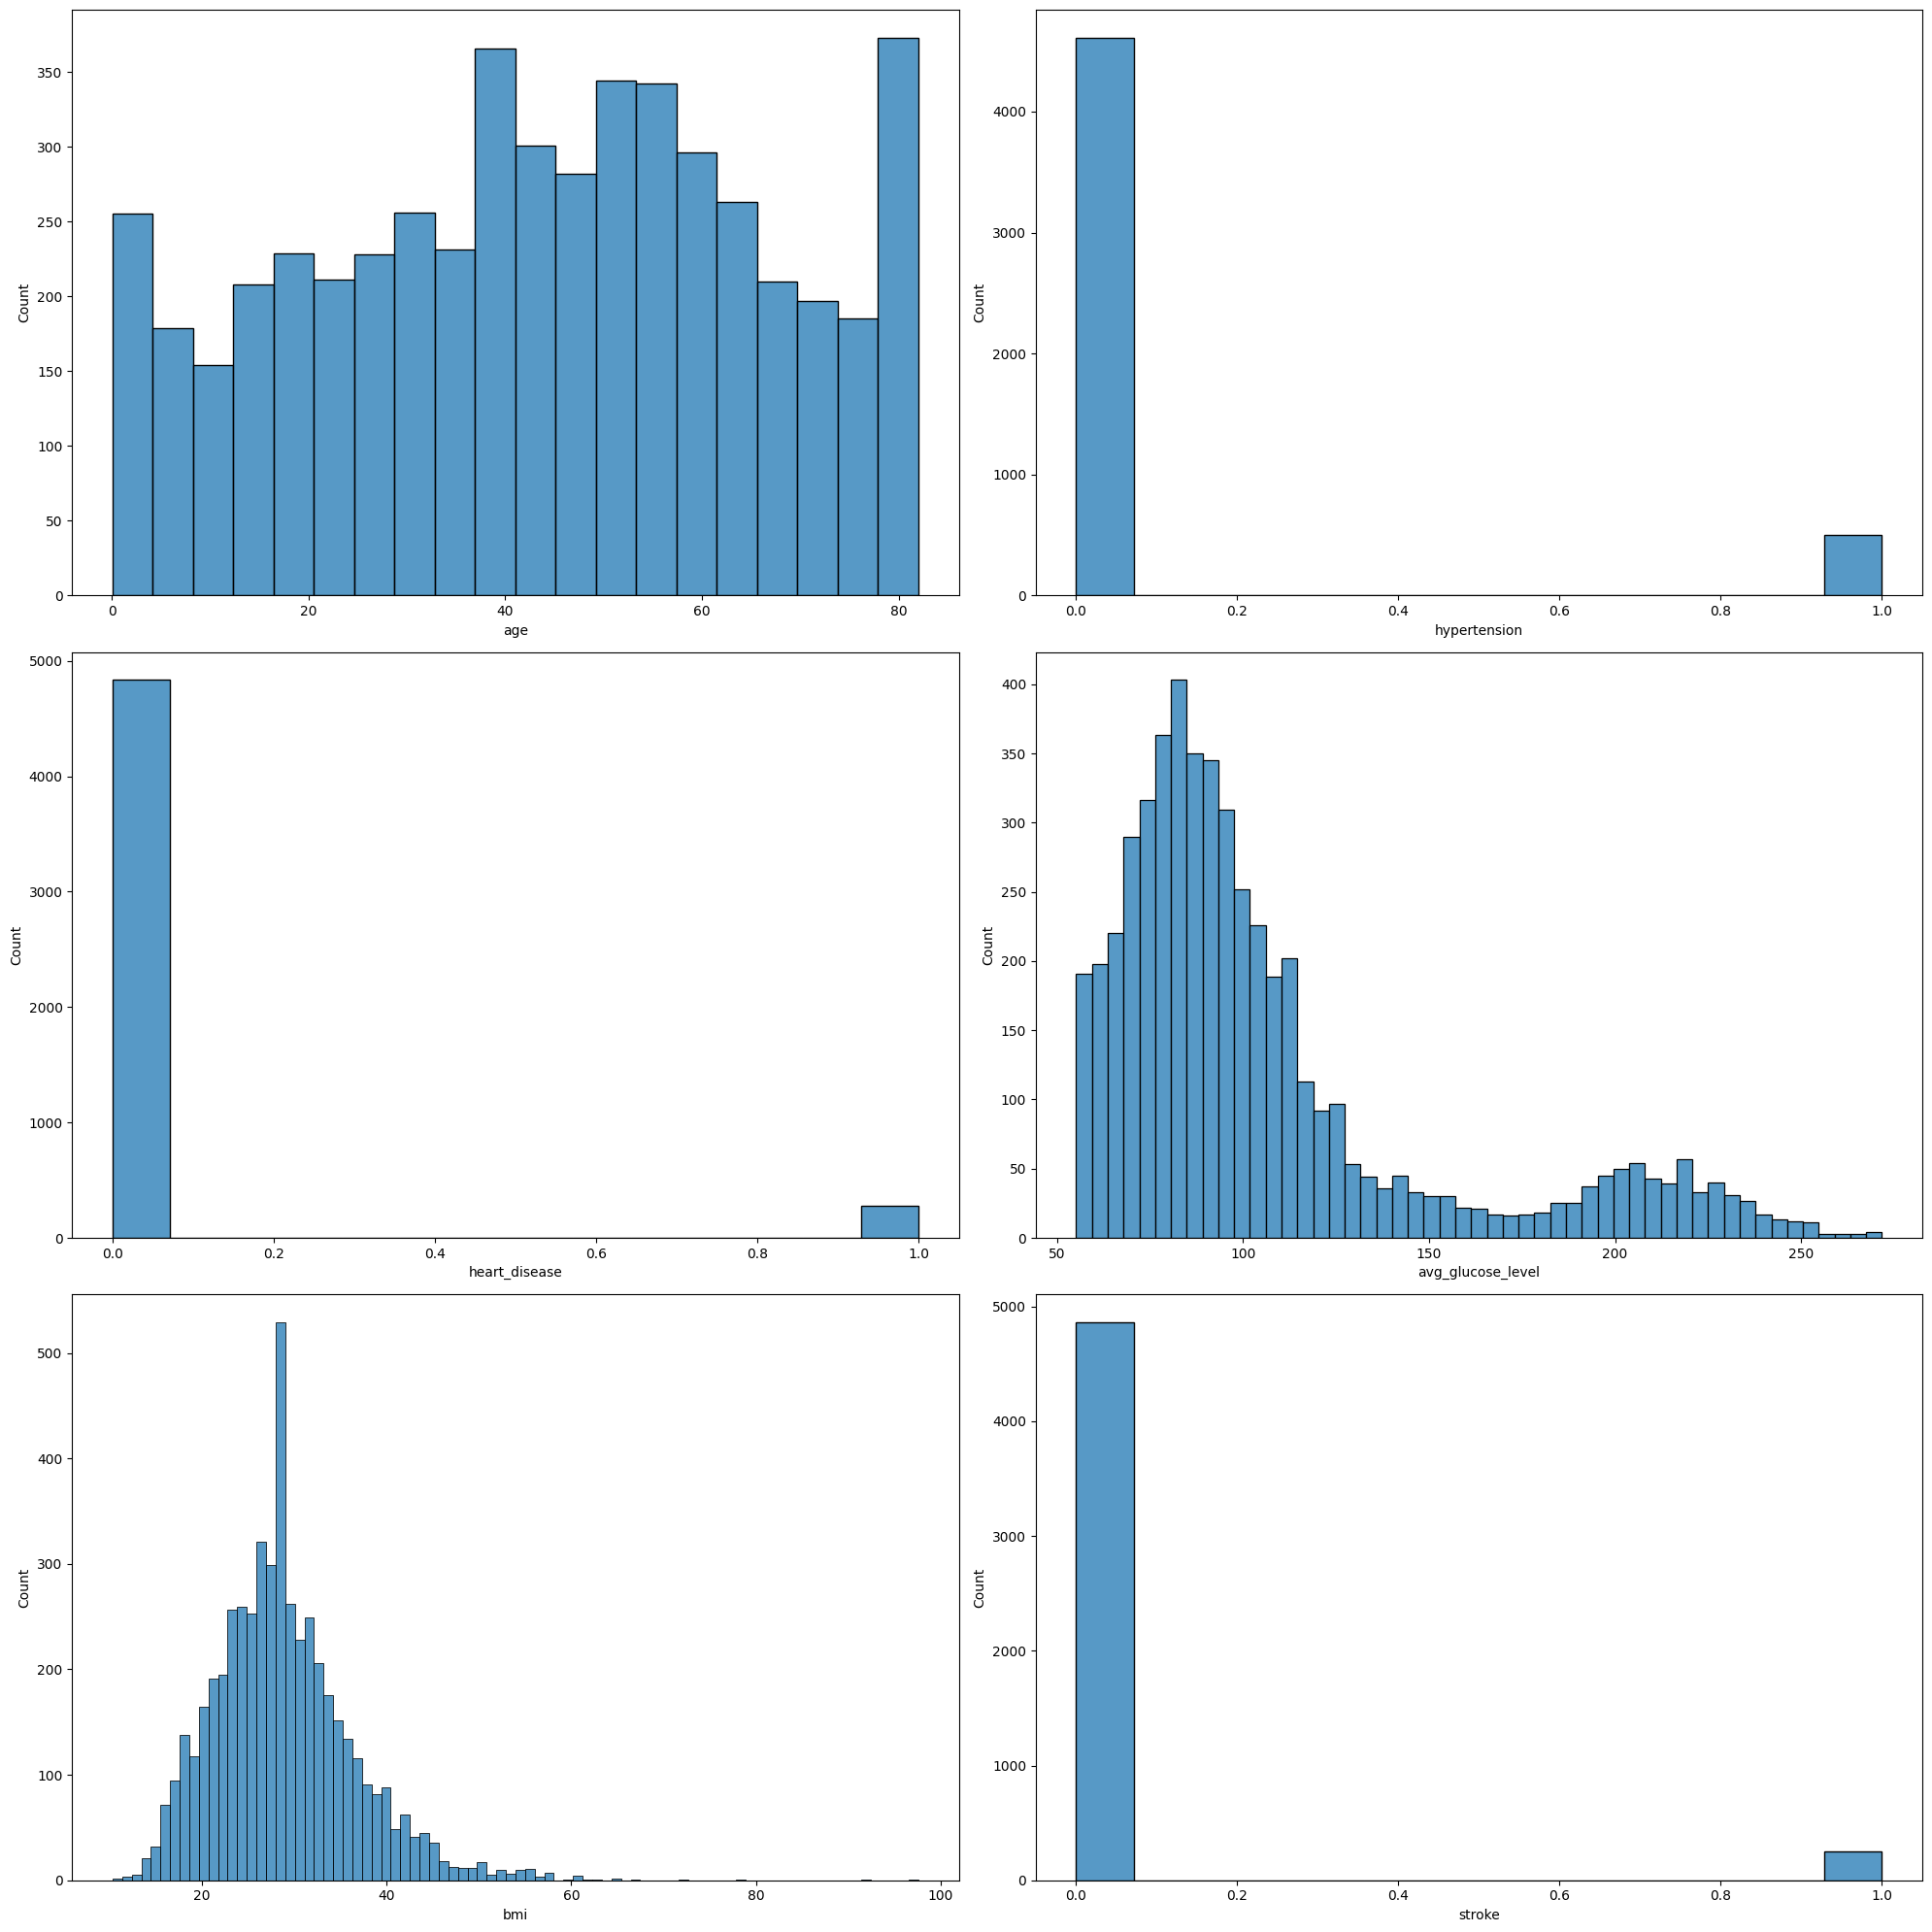

In [569]:
# For numerical columns
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
for x,y in zip(df_healthcare_num.columns,ax.flatten()):
    sns.histplot(x=df_healthcare_num[x],ax=y)
    
plt.tight_layout()
plt.show()

In [570]:
df_healthcare_cat.head(1)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked


In [571]:
for i in df_healthcare_cat.columns:
    #if i not in ['smoking_status','work_type']:
        le = LabelEncoder()
        encoded = le.fit_transform(df_healthcare_cat[i])
        df_healthcare_cat[i] = encoded
df_healthcare_cat.head(1)

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,1,1,1


In [572]:
#df_healthcare_cat['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2},inplace=True)
#df_healthcare_cat['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1},inplace=True)

In [573]:
df_healthcare_new = pd.concat([df_healthcare_num,df_healthcare_cat],axis=1)
df_healthcare_new.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.600000,1,1,1,1,1,1
1,61.0,0,0,202.21,28.893237,1,0,1,2,0,2
2,80.0,0,1,105.92,32.500000,1,1,1,1,0,2
3,49.0,0,0,171.23,34.400000,1,0,1,1,1,3
4,79.0,1,0,174.12,24.000000,1,0,1,2,0,2


In [574]:
# Checking outliers

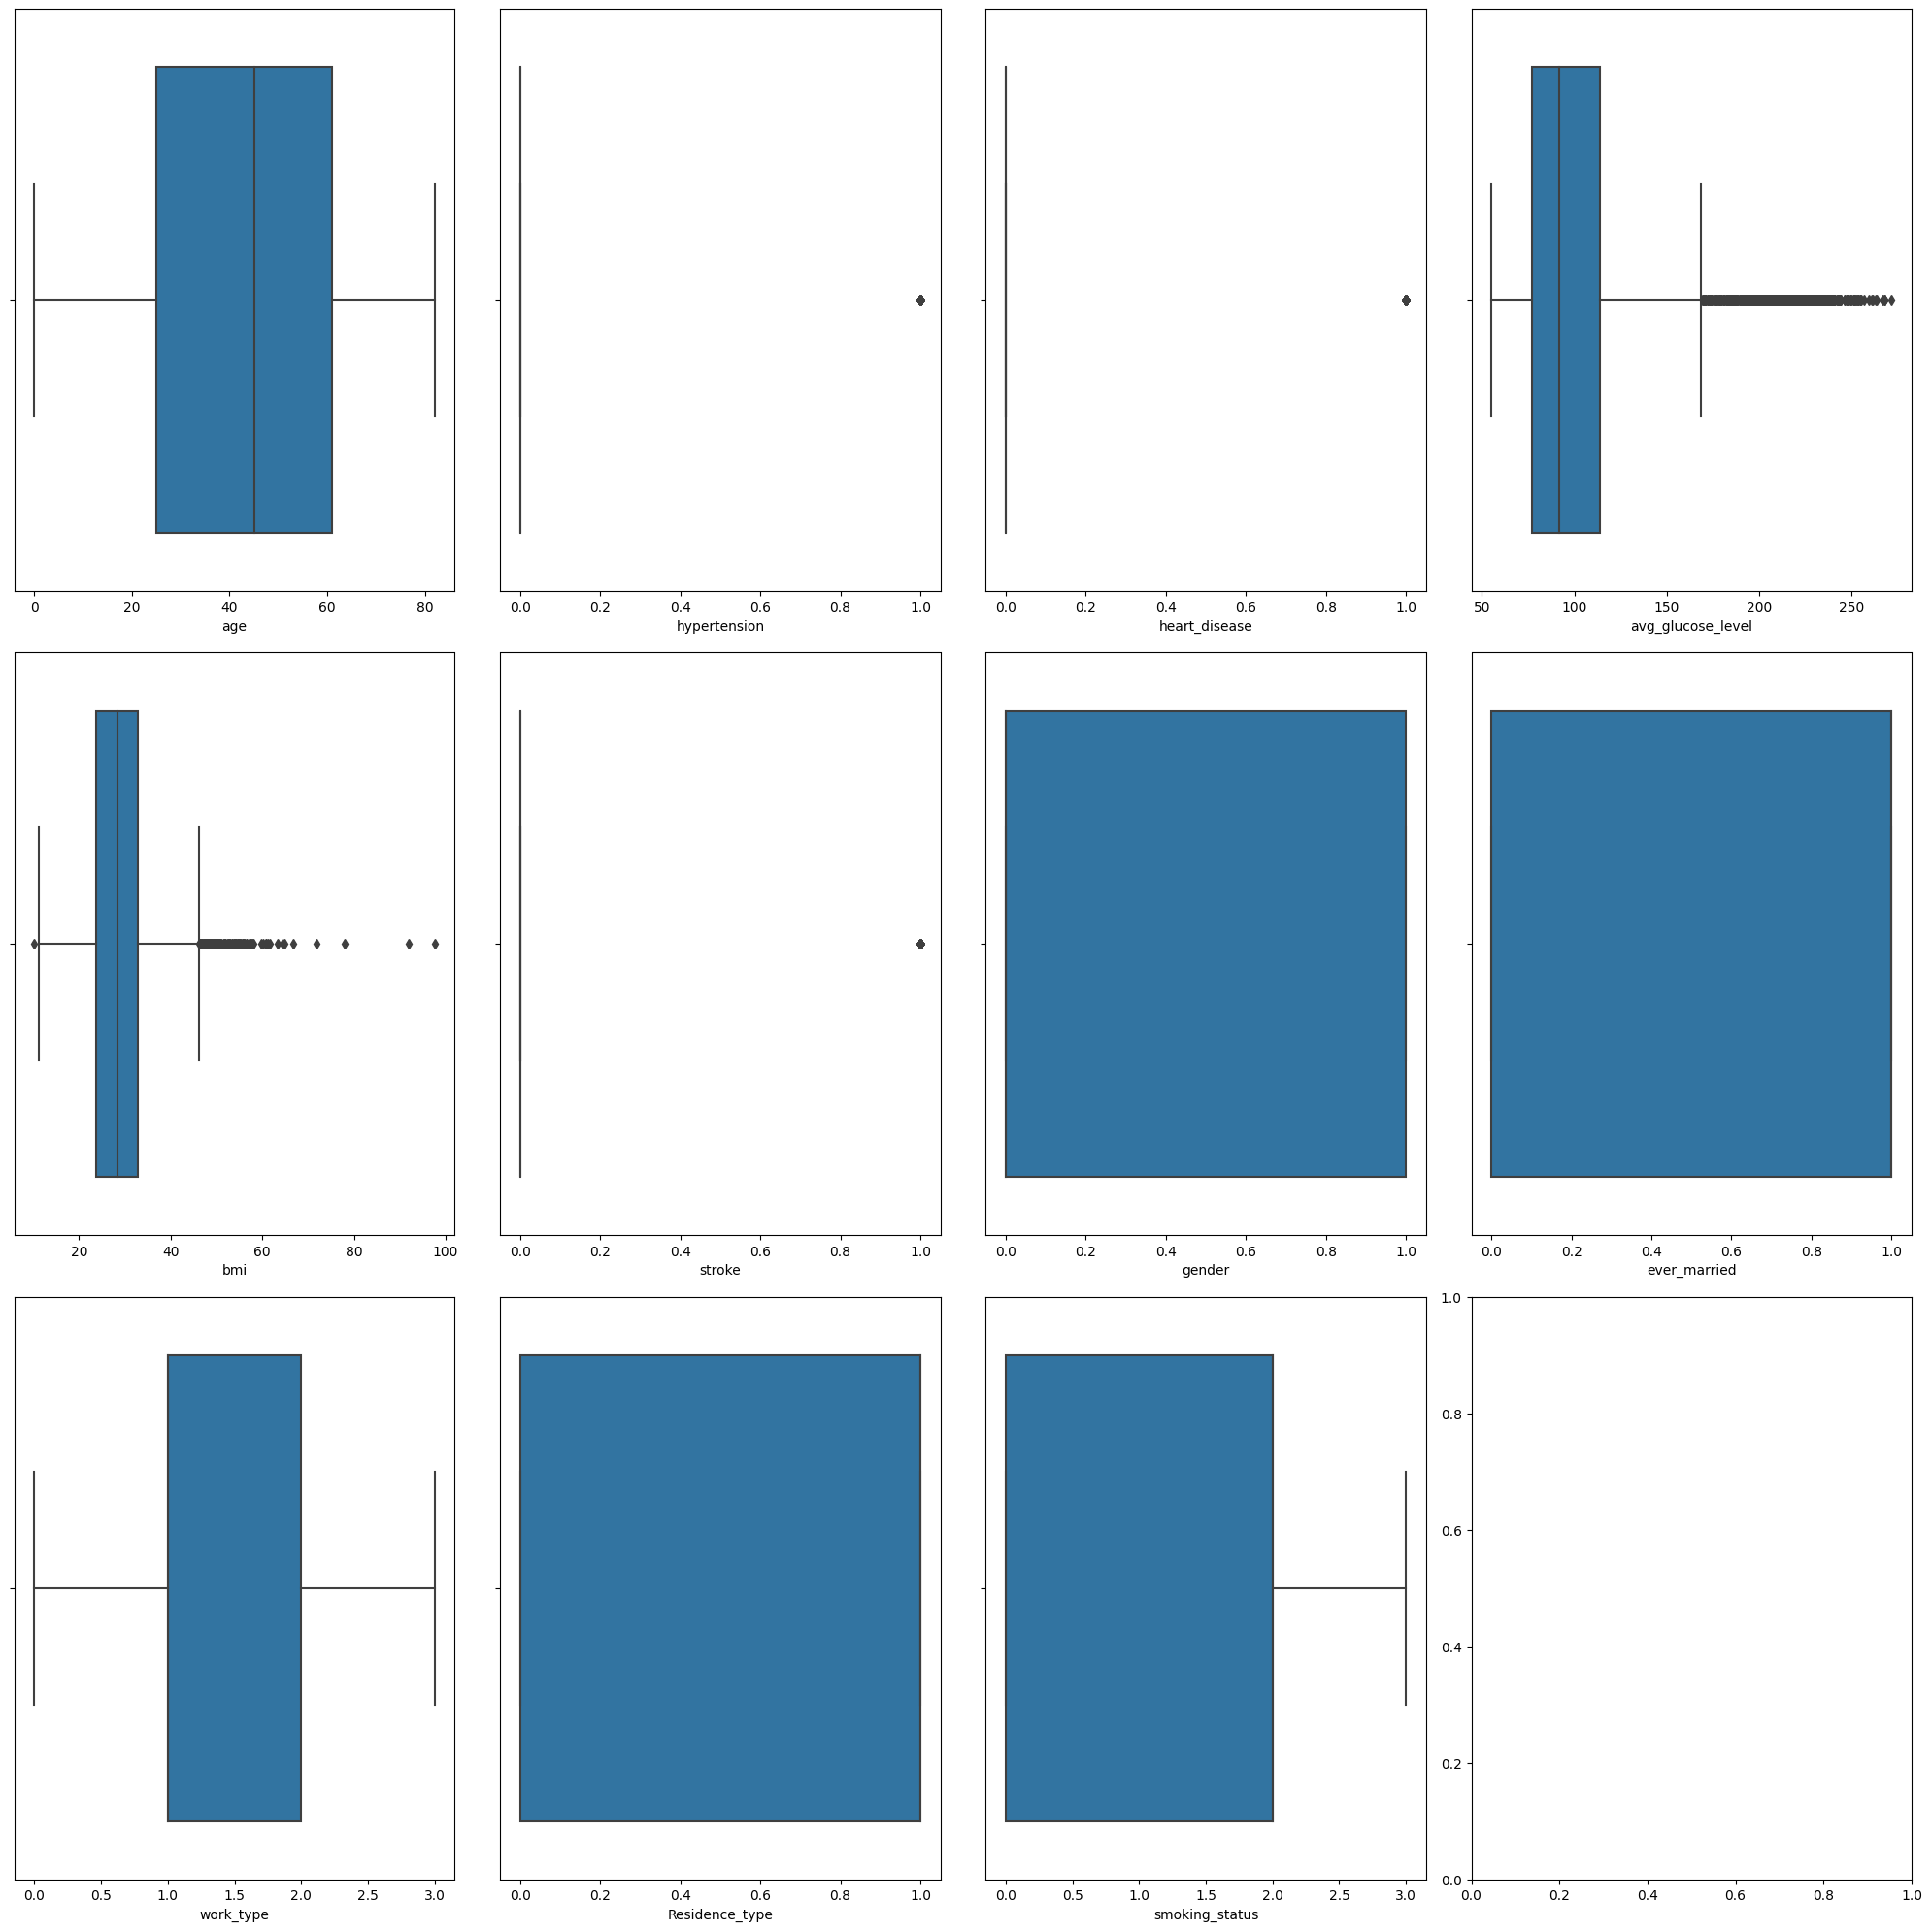

In [575]:
# For numerical columns
fig,ax = plt.subplots(nrows=3,ncols=4,figsize=(20,20))
for x,y in zip(df_healthcare_new.columns,ax.flatten()):
    sns.boxplot(x=df_healthcare_new[x],ax=y)
    
plt.tight_layout()
plt.show()

In [576]:
# we can see that BMI and avg_glucose level has outliers

In [577]:
#df_healthcare_new = df_healthcare_new[~(df_healthcare_new['bmi'] > 60)]

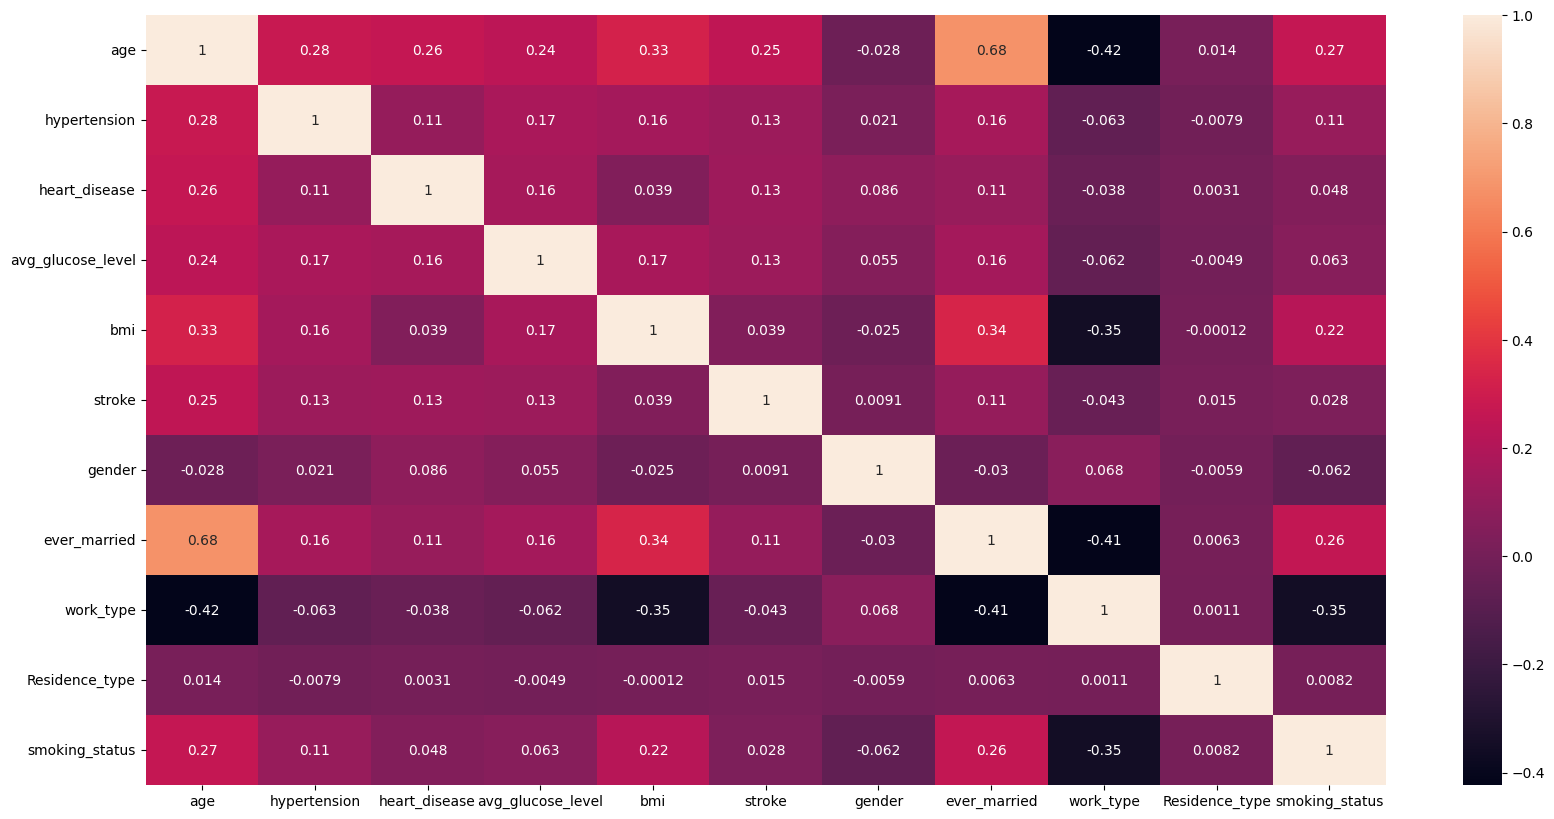

In [578]:
plt.figure(figsize=(20,10))
sns.heatmap(df_healthcare_new.corr(),annot=True)
plt.show()

In [579]:
# The is moderate high correlation between ever_married and age
# The is moderate high correlation between work_type and age
# The is moderate low correlation between ever_married and ever_married

In [581]:
# Removing work_type and work_type since it has high correlation between them. This might impact our further model and analysis.


In [582]:
pd.crosstab(index=df_healthcare_new2['stroke'],columns=df_healthcare_new2['smoking_status'],
            values=df_healthcare_new2['smoking_status'],aggfunc='count')

smoking_status,0,1,2,3
stroke,,,,
0,1497,815,1802,747
1,47,70,90,42


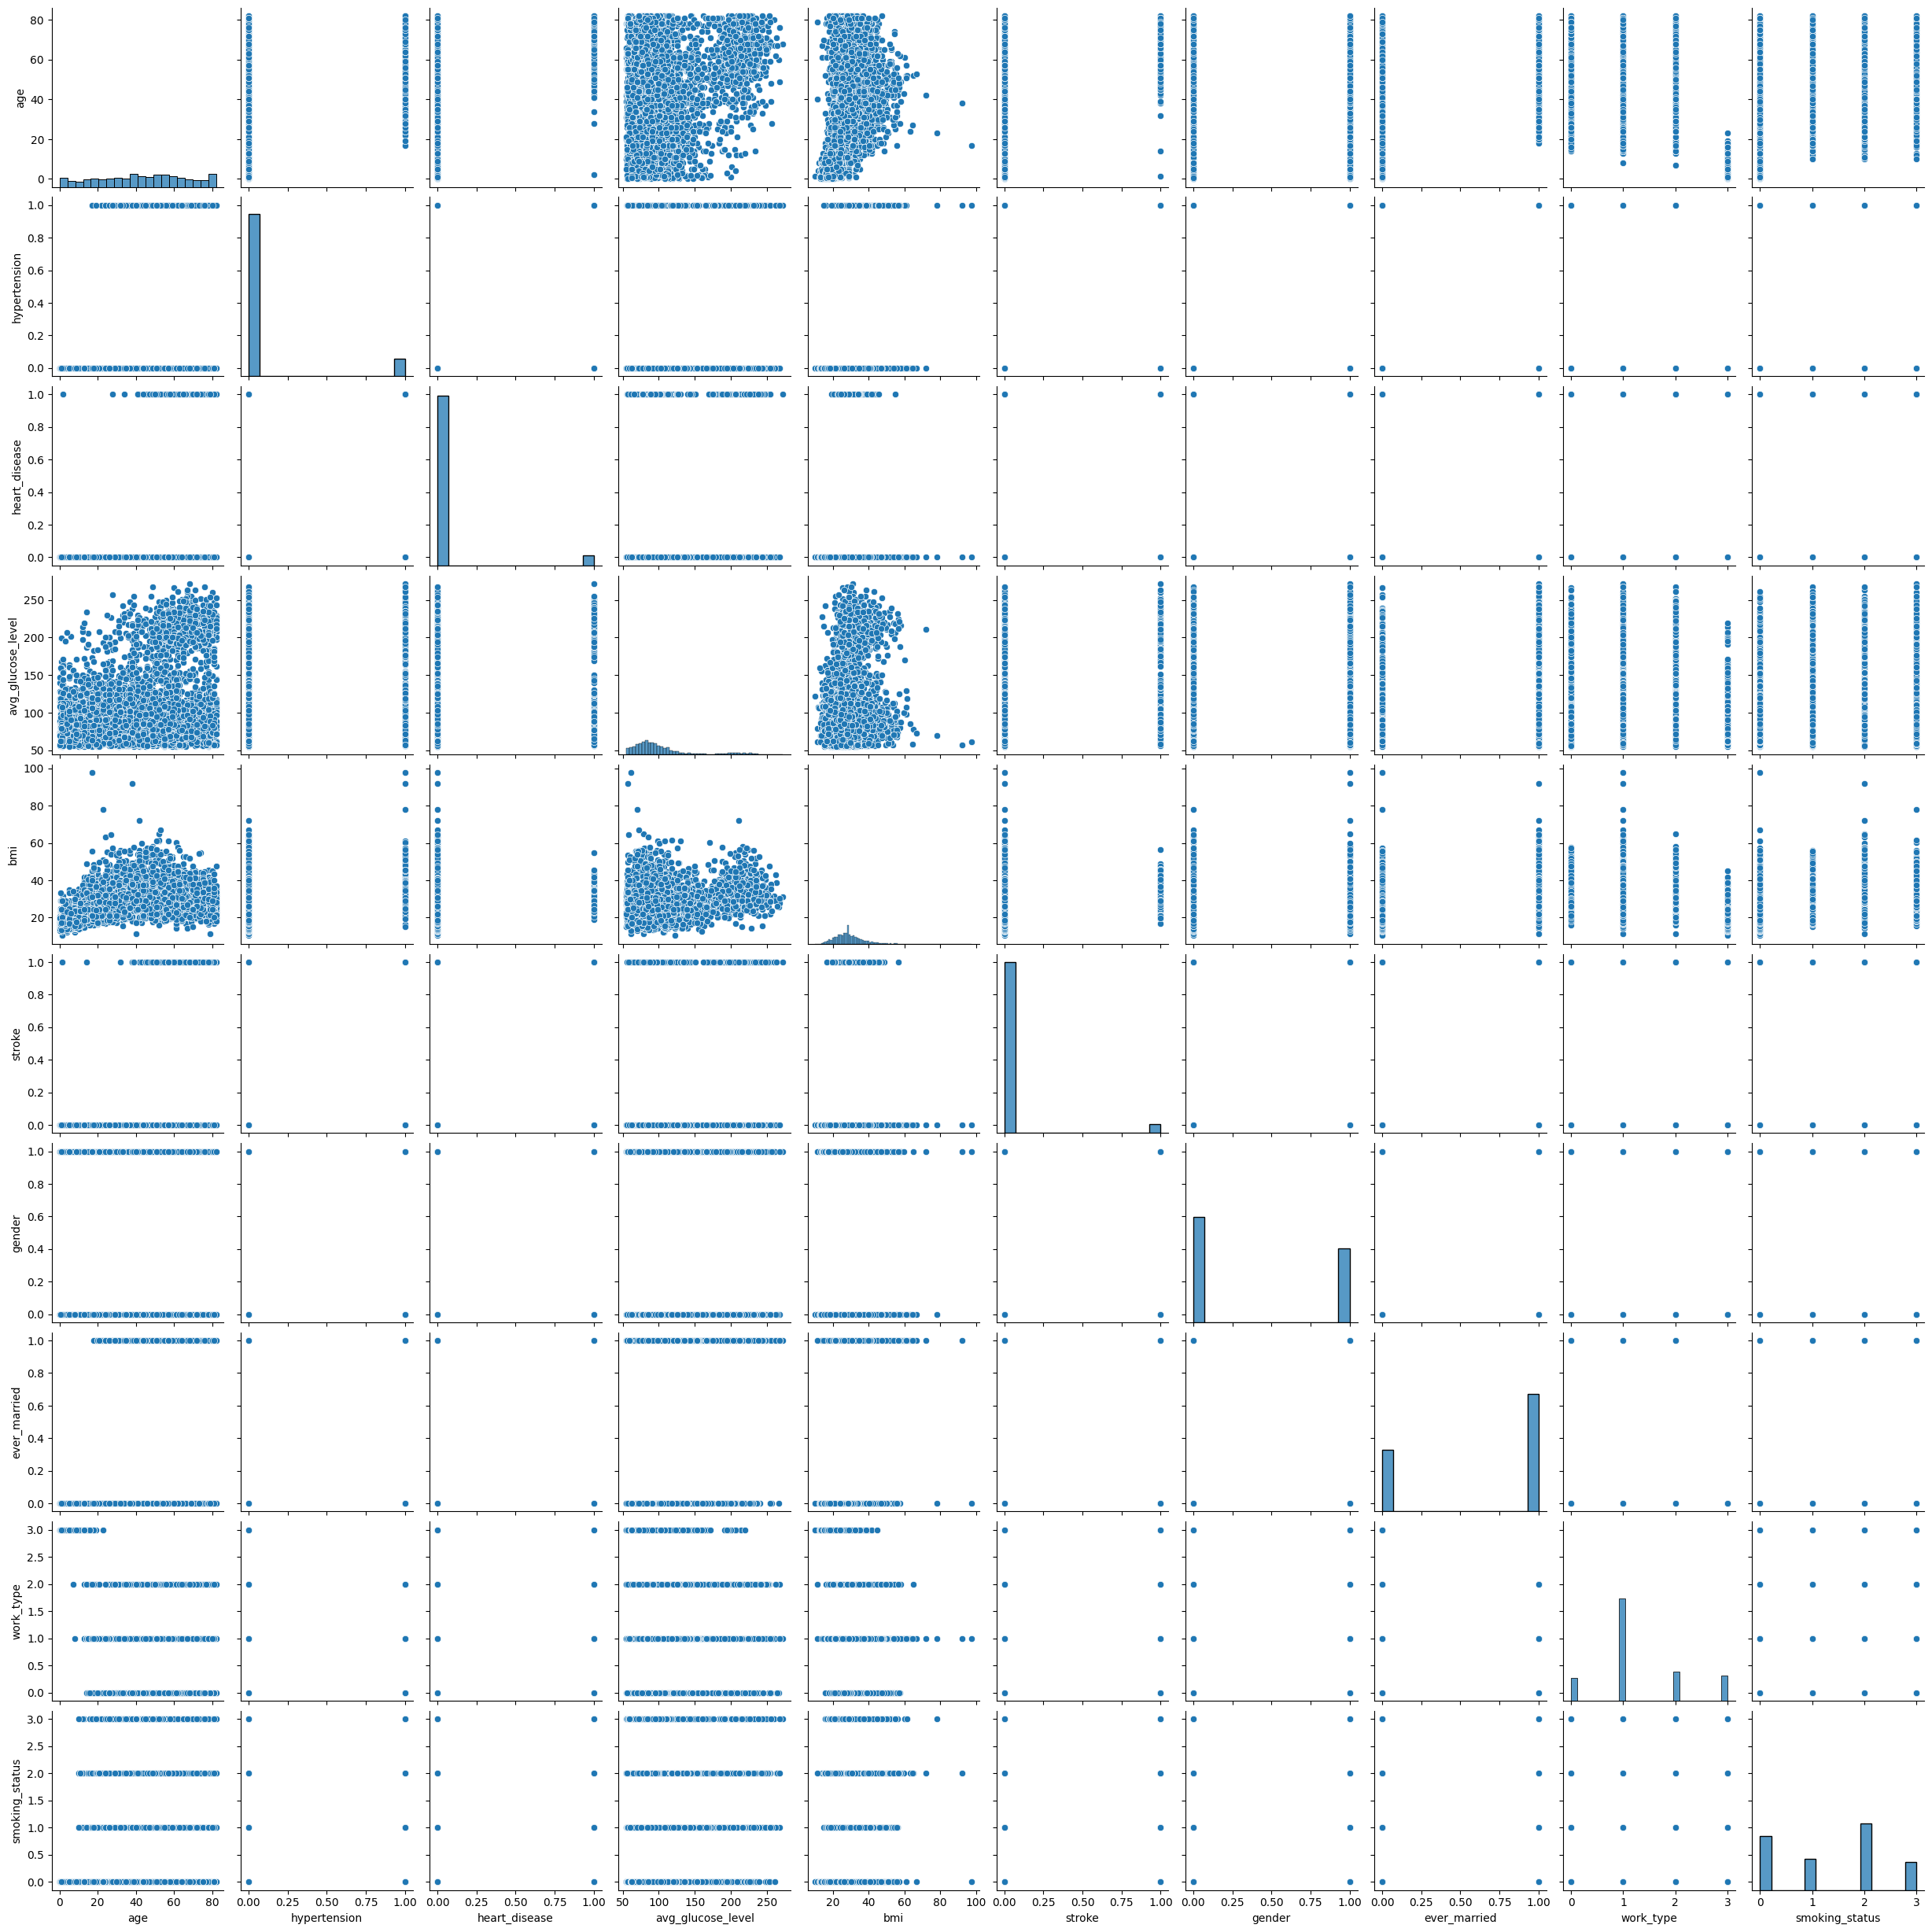

In [583]:
sns.pairplot(df_healthcare_new2);

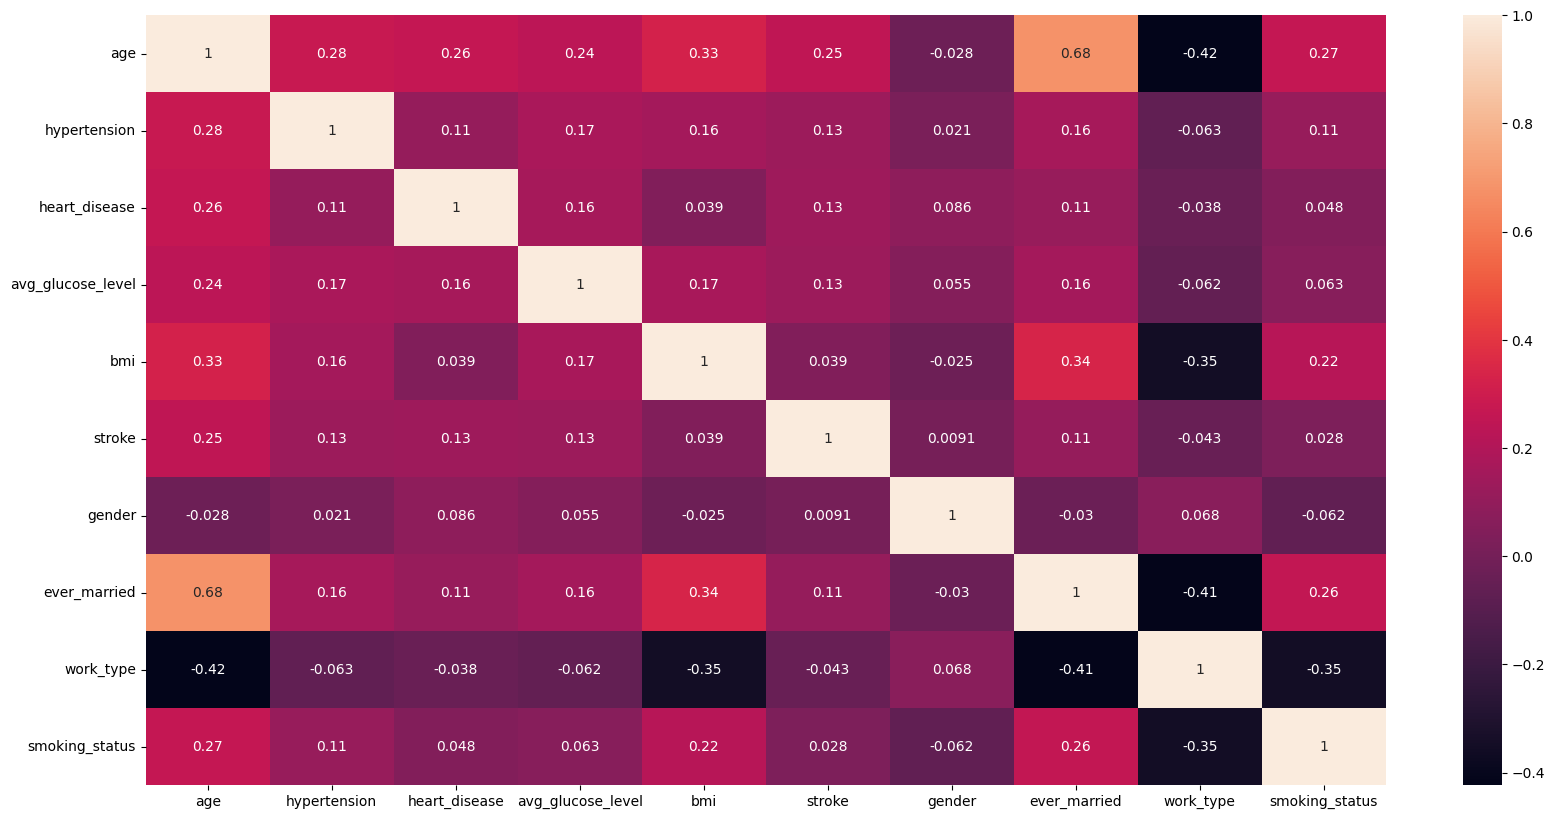

In [584]:
plt.figure(figsize=(20,10))
sns.heatmap(df_healthcare_new2.corr(),annot=True)
plt.show()

In [585]:
# spliting variable and target column
X = df_healthcare_new2.drop(['stroke'],axis=1)
y = df_healthcare_new2['stroke']

In [586]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,smoking_status
0,67.0,0,1,228.69,36.600000,1,1,1,1
1,61.0,0,0,202.21,28.893237,0,1,2,2
2,80.0,0,1,105.92,32.500000,1,1,1,2
3,49.0,0,0,171.23,34.400000,0,1,1,3
4,79.0,1,0,174.12,24.000000,0,1,2,2


In [587]:
# 'Residence_type','bmi','gender','ever_married','work_type

In [588]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X[['age','avg_glucose_level','bmi']])
X_dummy = pd.DataFrame(scaled,columns=['age','avg_glucose_level','bmi'])
X_scaled = pd.concat([X.drop(['age','avg_glucose_level','bmi'],axis=1),X_dummy],axis=1)
X_scaled

,hypertension,heart_disease,gender,ever_married,work_type,smoking_status,age,avg_glucose_level,bmi
0,0,1,1,1,1,1,1.051434,2.706375,1.001234e+00
1,0,0,0,1,2,2,0.786070,2.121559,4.615554e-16
2,0,1,1,1,1,2,1.626390,-0.005028,4.685773e-01
3,0,0,0,1,1,3,0.255342,1.437358,7.154182e-01
4,1,0,0,1,2,2,1.582163,1.501184,-6.357112e-01
...,...,...,...,...,...,...,...,...,...
5105,1,0,0,1,1,2,1.626390,-0.494658,4.615554e-16
5106,0,0,0,1,2,2,1.670617,0.420775,1.442949e+00
5107,0,0,0,1,2,2,-0.363842,-0.511443,2.217363e-01
5108,0,0,1,1,1,1,0.343796,1.328257,-4.278451e-01


In [590]:
df_healthcare_new2 = pd.concat([X_scaled,y],axis=1)
df_healthcare_new2.head()

,hypertension,heart_disease,gender,ever_married,work_type,smoking_status,age,avg_glucose_level,bmi,stroke
0,0,1,1,1,1,1,1.051434,2.706375,1.001234e+00,1
1,0,0,0,1,2,2,0.786070,2.121559,4.615554e-16,1
2,0,1,1,1,1,2,1.626390,-0.005028,4.685773e-01,1
3,0,0,0,1,1,3,0.255342,1.437358,7.154182e-01,1
4,1,0,0,1,2,2,1.582163,1.501184,-6.357112e-01,1


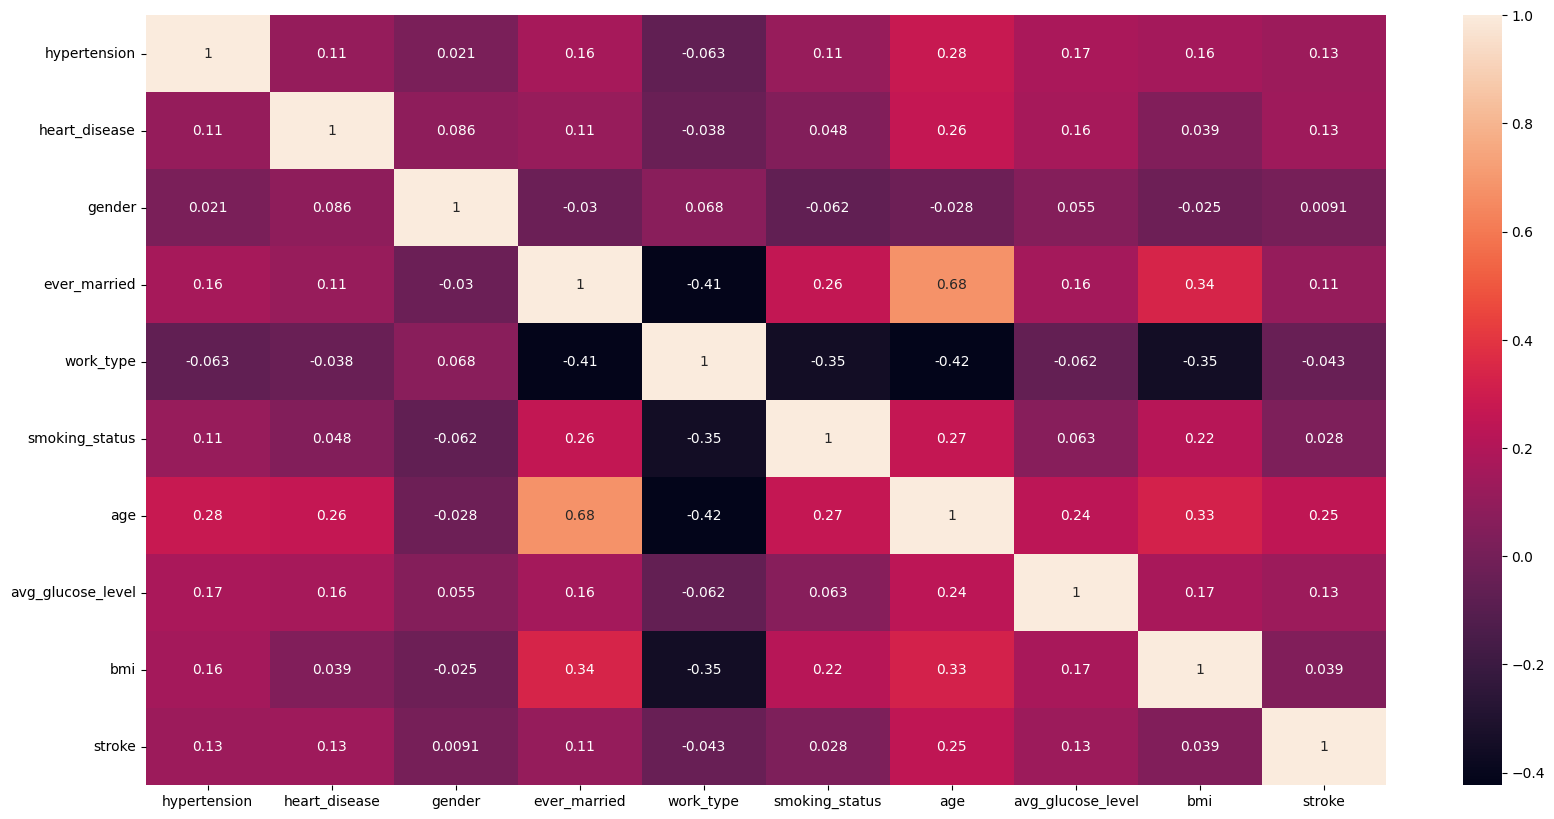

In [591]:
plt.figure(figsize=(20,10))
sns.heatmap(df_healthcare_new2.corr(),annot=True)
plt.show()

In [592]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df_healthcare_new2.values,i) for i in range(df_healthcare_new2.shape[1])]
vif['Feature'] = df_healthcare_new2.columns
vif.sort_values(by='VIF',ascending=False)

,VIF,Feature
3,3.691753,ever_married
4,2.718149,work_type
5,2.378278,smoking_status
6,2.161621,age
2,1.648834,gender
8,1.247318,bmi
0,1.236227,hypertension
1,1.174031,heart_disease
9,1.136501,stroke
7,1.103828,avg_glucose_level


In [595]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=10,test_size=0.2,stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4088, 9)
(4088,)
(1022, 9)
(1022,)


# Building base model

In [596]:
logit = sm.Logit(y_train,X_train).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.184793
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 4088
Model:                          Logit   Df Residuals:                     4079
Method:                           MLE   Df Model:                            8
Date:                Sun, 19 Mar 2023   Pseudo R-squ.:                 0.05043
Time:                        23:39:01   Log-Likelihood:                -755.43
converged:                       True   LL-Null:                       -795.55
Covariance Type:            nonrobust   LLR p-value:                 4.369e-14
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
hypertension          0.3231      0.191      1.692      0.091      -0.051       0.697
heart_disease         0.2681      0.232      1.155      0.248      -0.187       0.723
gender               -0.6104      0.145     -4.196      0.000      -0.896      -0.325
ever_married         -1.9420      0.148    -13.141      0.000      -2.232      -1.652
work_type            -1.0030      0.088    -11.401      0.000      -1.175      -0.831
smoking_status       -0.5583      0.063     -8.830      0.000      -0.682      -0.434
age                   1.4195      0.103     13.767      0.000       1.217       1.622
avg_glucose_level     0.2202      0.059      3.717      0.000       0.104       0.336
bmi                  -0.0561      0.081     -0.695      0.487      -0.215       0.102
=====================================================================================
"""

In [598]:
logit = sm.Logit(y_train,X_train.drop(['bmi','heart_disease'],axis=1)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.185018
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 4088
Model:                          Logit   Df Residuals:                     4081
Method:                           MLE   Df Model:                            6
Date:                Sun, 19 Mar 2023   Pseudo R-squ.:                 0.04927
Time:                        23:39:37   Log-Likelihood:                -756.35
converged:                       True   LL-Null:                       -795.55
Covariance Type:            nonrobust   LLR p-value:                 7.645e-15
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
hypertension          0.3300      0.189      1.742      0.082      -0.041       0.701
gender               -0.5950      0.144     -4.119      0.000      -0.878      -0.312
ever_married         -1.9619      0.147    -13.383      0.000      -2.249      -1.675
work_type            -0.9911      0.088    -11.300      0.000      -1.163      -0.819
smoking_status       -0.5582      0.063     -8.841      0.000      -0.682      -0.434
age                   1.4440      0.102     14.218      0.000       1.245       1.643
avg_glucose_level     0.2190      0.058      3.775      0.000       0.105       0.333
=====================================================================================
"""

In [600]:
log = LogisticRegression(random_state=10)
log.fit(X_train,y_train)
y_pred = log.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[972,   0],
       [ 50,   0]], dtype=int64)

In [601]:
print('Accuracy Score : ',accuracy_score(y_true=y_test,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test,y_pred))

Accuracy Score :  0.9510763209393346
Recall Score :  0.0
Precision Score : 0.0
F1 Score :  0.0
Cohen_kappa_score :  0.0
Roc_auc_score :  0.5


In [ ]:
# Buidling Other Model as well and try to compare with base model

In [603]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[916,  56],
       [ 42,   8]], dtype=int64)

In [604]:
print('Accuracy Score : ',accuracy_score(y_true=y_test,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test,y_pred))

Accuracy Score :  0.9041095890410958
Recall Score :  0.16
Precision Score : 0.125
F1 Score :  0.14035087719298245
Cohen_kappa_score :  0.09038398663130742
Roc_auc_score :  0.5511934156378601


In [605]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[970,   2],
       [ 50,   0]], dtype=int64)

In [606]:
print('Accuracy Score : ',accuracy_score(y_true=y_test,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test,y_pred))

Accuracy Score :  0.949119373776908
Recall Score :  0.0
Precision Score : 0.0
F1 Score :  0.0
Cohen_kappa_score :  -0.0037775763070413415
Roc_auc_score :  0.49897119341563784


In [607]:
ada = AdaBoostClassifier(random_state=10)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[966,   6],
       [ 49,   1]], dtype=int64)

In [608]:
print('Accuracy Score : ',accuracy_score(y_true=y_test,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test,y_pred))

Accuracy Score :  0.9461839530332681
Recall Score :  0.02
Precision Score : 0.14285714285714285
F1 Score :  0.03508771929824562
Cohen_kappa_score :  0.023351982486013223
Roc_auc_score :  0.5069135802469136


In [609]:
gbb = GradientBoostingClassifier(random_state=10)
gbb.fit(X_train,y_train)
y_pred = gbb.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[969,   3],
       [ 50,   0]], dtype=int64)

In [610]:
print('Accuracy Score : ',accuracy_score(y_true=y_test,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test,y_pred))

Accuracy Score :  0.9481409001956947
Recall Score :  0.0
Precision Score : 0.0
F1 Score :  0.0
Cohen_kappa_score :  -0.005569375858612169
Roc_auc_score :  0.4984567901234568


In [611]:
print('Accuracy Score : ',accuracy_score(y_true=y_test,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test,y_pred))

Accuracy Score :  0.9481409001956947
Recall Score :  0.0
Precision Score : 0.0
F1 Score :  0.0
Cohen_kappa_score :  -0.005569375858612169
Roc_auc_score :  0.4984567901234568


In [612]:
xbb = XGBClassifier(random_state=10)
xbb.fit(X_train,y_train)
y_pred = xbb.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[963,   9],
       [ 44,   6]], dtype=int64)

In [613]:
print('Accuracy Score : ',accuracy_score(y_true=y_test,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test,y_pred))

Accuracy Score :  0.9481409001956947
Recall Score :  0.12
Precision Score : 0.4
F1 Score :  0.18461538461538463
Cohen_kappa_score :  0.1657785307253966
Roc_auc_score :  0.5553703703703704


In [ ]:
# Since we have huge imbalance in the data due to this our is not able to detect the patient having stroke.
# we need to focus on recall anf f1 score
# We will try to use balance the data.

# Handling Data Imbalance

### Using Near Miss (Under sampling)

In [614]:
nm = NearMiss()
X_nm,y_nm = nm.fit_resample(X_scaled,y)
X_train_nm,X_test_nm,y_train_nm,y_test_nm = train_test_split(X_nm,y_nm,random_state=10,test_size=0.2,stratify=y_nm)
print(X_train_nm.shape)
print(X_test_nm.shape)
print(y_train_nm.shape)
print(y_test_nm.shape)

(398, 9)
(100, 9)
(398,)
(100,)


In [615]:
log_rg = LogisticRegression(random_state=10)
log_rg.fit(X_train_nm,y_train_nm)
y_pred = log_rg.predict(X_test_nm)
confusion_matrix(y_true=y_test_nm,y_pred=y_pred)

array([[44,  6],
       [14, 36]], dtype=int64)

In [616]:
print('Accuracy Score : ',accuracy_score(y_true=y_test_nm,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test_nm,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test_nm,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test_nm,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test_nm,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test_nm,y_pred))

Accuracy Score :  0.8
Recall Score :  0.72
Precision Score : 0.8571428571428571
F1 Score :  0.782608695652174
Cohen_kappa_score :  0.6
Roc_auc_score :  0.8


In [617]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train_nm,y_train_nm)
y_pred = dt.predict(X_test_nm)
confusion_matrix(y_true=y_test_nm,y_pred=y_pred)

array([[40, 10],
       [17, 33]], dtype=int64)

In [618]:
print('Accuracy Score : ',accuracy_score(y_true=y_test_nm,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test_nm,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test_nm,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test_nm,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test_nm,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test_nm,y_pred))

Accuracy Score :  0.73
Recall Score :  0.66
Precision Score : 0.7674418604651163
F1 Score :  0.7096774193548386
Cohen_kappa_score :  0.45999999999999996
Roc_auc_score :  0.7300000000000002


In [619]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_nm,y_train_nm)
y_pred = rf.predict(X_test_nm)
confusion_matrix(y_true=y_test_nm,y_pred=y_pred)

array([[40, 10],
       [10, 40]], dtype=int64)

In [620]:
print('Accuracy Score : ',accuracy_score(y_true=y_test_nm,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test_nm,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test_nm,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test_nm,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test_nm,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test_nm,y_pred))

Accuracy Score :  0.8
Recall Score :  0.8
Precision Score : 0.8
F1 Score :  0.8000000000000002
Cohen_kappa_score :  0.6
Roc_auc_score :  0.8


In [621]:
ada = AdaBoostClassifier(random_state=10)
ada.fit(X_train_nm,y_train_nm)
y_pred = ada.predict(X_test_nm)
confusion_matrix(y_true=y_test_nm,y_pred=y_pred)

array([[44,  6],
       [17, 33]], dtype=int64)

In [622]:
print('Accuracy Score : ',accuracy_score(y_true=y_test_nm,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test_nm,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test_nm,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test_nm,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test_nm,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test_nm,y_pred))

Accuracy Score :  0.77
Recall Score :  0.66
Precision Score : 0.8461538461538461
F1 Score :  0.7415730337078651
Cohen_kappa_score :  0.54
Roc_auc_score :  0.77


In [623]:
gb = GradientBoostingClassifier(random_state=10)
gb.fit(X_train_nm,y_train_nm)
y_pred = gb.predict(X_test_nm)
confusion_matrix(y_true=y_test_nm,y_pred=y_pred)

array([[41,  9],
       [12, 38]], dtype=int64)

In [624]:
print('Accuracy Score : ',accuracy_score(y_true=y_test_nm,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test_nm,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test_nm,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test_nm,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test_nm,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test_nm,y_pred))

Accuracy Score :  0.79
Recall Score :  0.76
Precision Score : 0.8085106382978723
F1 Score :  0.7835051546391754
Cohen_kappa_score :  0.5800000000000001
Roc_auc_score :  0.79


In [625]:
xbb = XGBClassifier(random_state=10)
xbb.fit(X_train_nm,y_train_nm)
y_pred = xbb.predict(X_test_nm)
confusion_matrix(y_true=y_test_nm,y_pred=y_pred)

array([[41,  9],
       [13, 37]], dtype=int64)

In [626]:
print('Accuracy Score : ',accuracy_score(y_true=y_test_nm,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test_nm,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test_nm,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test_nm,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test_nm,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test_nm,y_pred))

Accuracy Score :  0.78
Recall Score :  0.74
Precision Score : 0.8043478260869565
F1 Score :  0.7708333333333333
Cohen_kappa_score :  0.56
Roc_auc_score :  0.78


In [627]:
nb = GaussianNB()
nb.fit(X_train_nm,y_train_nm)
y_pred = nb.predict(X_test_nm)
confusion_matrix(y_true=y_test_nm,y_pred=y_pred)

array([[49,  1],
       [27, 23]], dtype=int64)

In [628]:
print('Accuracy Score : ',accuracy_score(y_true=y_test_nm,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test_nm,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test_nm,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test_nm,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test_nm,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test_nm,y_pred))

Accuracy Score :  0.72
Recall Score :  0.46
Precision Score : 0.9583333333333334
F1 Score :  0.6216216216216216
Cohen_kappa_score :  0.43999999999999995
Roc_auc_score :  0.72


In [629]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_nm,y_train_nm)
y_pred = knn.predict(X_test_nm)
confusion_matrix(y_true=y_test_nm,y_pred=y_pred)

array([[46,  4],
       [17, 33]], dtype=int64)

In [630]:
print('Accuracy Score : ',accuracy_score(y_true=y_test_nm,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test_nm,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test_nm,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test_nm,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test_nm,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test_nm,y_pred))

Accuracy Score :  0.79
Recall Score :  0.66
Precision Score : 0.8918918918918919
F1 Score :  0.7586206896551725
Cohen_kappa_score :  0.5800000000000001
Roc_auc_score :  0.79


In [631]:
kf = KFold(n_splits=10,random_state=10,shuffle=True)
score = cross_val_score(RandomForestClassifier(),X_train_nm,y_train_nm,cv=kf)
print('Score:',score)
print('Average Score',np.mean(score))

Score: [0.85       0.825      0.775      0.775      0.85       0.675
 0.825      0.75       0.92307692 0.74358974]
Average Score 0.7991666666666666


In [632]:
kf = KFold(n_splits=10,random_state=10,shuffle=True)
score = cross_val_score(XGBClassifier(),X_train_nm,y_train_nm,cv=kf)
print('Score:',score)
print('Average Score',np.mean(score))

Score: [0.8        0.8        0.85       0.75       0.85       0.8
 0.875      0.75       0.8974359  0.74358974]
Average Score 0.811602564102564


In [633]:
kf = KFold(n_splits=10,random_state=10,shuffle=True)
score = cross_val_score(AdaBoostClassifier(),X_test_nm,y_test_nm,cv=kf)
print('Score:',score)
print('Average Score',np.mean(score))

Score: [0.7 0.6 0.6 0.7 0.6 0.8 0.4 1.  0.8 0.7]
Average Score 0.69


In [ ]:
# Adaboasting is performing better in case Undersampling in case of true positive rate

### using SMOTE (Over Sampling)

In [634]:
smt = SMOTE(random_state=10,sampling_strategy='minority')
Oversample_X,Oversample_y = smt.fit_resample(X_scaled,y)

X_train_sm,X_test_sm,y_train_sm,y_test_sm = train_test_split(Oversample_X,Oversample_y,
                                                             random_state=10,test_size=0.2,stratify=Oversample_y)
print(X_train_sm.shape)
print(X_test_sm.shape)
print(y_train_sm.shape)
print(y_test_sm.shape)

(7777, 9)
(1945, 9)
(7777,)
(1945,)


In [635]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train_sm,y_train_sm)
y_pred = dt.predict(X_test_sm)
confusion_matrix(y_true=y_test_sm,y_pred=y_pred)

array([[852, 120],
       [ 78, 895]], dtype=int64)

In [636]:
print('Accuracy Score : ',accuracy_score(y_true=y_test_sm,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test_sm,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test_sm,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test_sm,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test_sm,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test_sm,y_pred))

Accuracy Score :  0.8982005141388175
Recall Score :  0.9198355601233299
Precision Score : 0.8817733990147784
F1 Score :  0.9004024144869215
Cohen_kappa_score :  0.7963964535519992
Roc_auc_score :  0.8981893849999365


In [637]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_sm,y_train_sm)
y_pred = rf.predict(X_test_sm)
confusion_matrix(y_true=y_test_sm,y_pred=y_pred)

array([[872, 100],
       [ 28, 945]], dtype=int64)

In [638]:
print('Accuracy Score : ',accuracy_score(y_true=y_test_sm,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test_sm,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test_sm,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test_sm,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test_sm,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test_sm,y_pred))

Accuracy Score :  0.9341902313624678
Recall Score :  0.9712230215827338
Precision Score : 0.9043062200956937
F1 Score :  0.9365708622398413
Cohen_kappa_score :  0.8683754176711923
Roc_auc_score :  0.9341711815732598


In [639]:
ada = AdaBoostClassifier(random_state=10)
ada.fit(X_train_sm,y_train_sm)
y_pred = ada.predict(X_test_sm)
confusion_matrix(y_true=y_test_sm,y_pred=y_pred)

array([[741, 231],
       [135, 838]], dtype=int64)

In [640]:
print('Accuracy Score : ',accuracy_score(y_true=y_test_sm,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test_sm,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test_sm,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test_sm,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test_sm,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test_sm,y_pred))

Accuracy Score :  0.8118251928020566
Recall Score :  0.8612538540596094
Precision Score : 0.7839101964452759
F1 Score :  0.8207639569049949
Cohen_kappa_score :  0.6236311842556053
Roc_auc_score :  0.8117997665359775


In [641]:
gb = GradientBoostingClassifier(random_state=10)
gb.fit(X_train_sm,y_train_sm)
y_pred = gb.predict(X_test_sm)
confusion_matrix(y_true=y_test_sm,y_pred=y_pred)

array([[784, 188],
       [ 97, 876]], dtype=int64)

In [642]:
print('Accuracy Score : ',accuracy_score(y_true=y_test_sm,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test_sm,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test_sm,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test_sm,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test_sm,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test_sm,y_pred))

Accuracy Score :  0.8534704370179949
Recall Score :  0.9003083247687564
Precision Score : 0.8233082706766918
F1 Score :  0.8600883652430044
Cohen_kappa_score :  0.7069266969120043
Roc_auc_score :  0.8534463434543371


In [643]:
xgb = XGBClassifier(random_state=10)
xgb.fit(X_train_sm,y_train_sm)
y_pred = xgb.predict(X_test_sm)
confusion_matrix(y_true=y_test_sm,y_pred=y_pred)

array([[927,  45],
       [ 41, 932]], dtype=int64)

In [644]:
print('Accuracy Score : ',accuracy_score(y_true=y_test_sm,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test_sm,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test_sm,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test_sm,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test_sm,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test_sm,y_pred))

Accuracy Score :  0.9557840616966581
Recall Score :  0.9578622816032888
Precision Score : 0.9539406345957011
F1 Score :  0.955897435897436
Cohen_kappa_score :  0.9115679130090911
Roc_auc_score :  0.9557829926534962


In [645]:
gb = GaussianNB()
gb.fit(X_train_sm,y_train_sm)
y_pred = gb.predict(X_test_sm)
confusion_matrix(y_true=y_test_sm,y_pred=y_pred)

array([[666, 306],
       [172, 801]], dtype=int64)

In [646]:
print('Accuracy Score : ',accuracy_score(y_true=y_test_sm,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test_sm,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test_sm,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test_sm,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test_sm,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test_sm,y_pred))

Accuracy Score :  0.7542416452442159
Recall Score :  0.8232271325796505
Precision Score : 0.7235772357723578
F1 Score :  0.7701923076923076
Cohen_kappa_score :  0.5084483376670343
Roc_auc_score :  0.7542061588824178


In [647]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sm,y_train_sm)
y_pred = knn.predict(X_test_sm)
confusion_matrix(y_true=y_test_sm,y_pred=y_pred)

array([[758, 214],
       [ 20, 953]], dtype=int64)

In [648]:
print('Accuracy Score : ',accuracy_score(y_true=y_test_sm,y_pred=y_pred))
print('Recall Score : ',recall_score(y_true=y_test_sm,y_pred=y_pred))
print('Precision Score :',precision_score(y_true=y_test_sm,y_pred=y_pred))
print('F1 Score : ',f1_score(y_true=y_test_sm,y_pred=y_pred))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test_sm,y_pred))
print("Roc_auc_score : ",roc_auc_score(y_test_sm,y_pred))

Accuracy Score :  0.8796915167095116
Recall Score :  0.9794450154162384
Precision Score : 0.81662382176521
F1 Score :  0.8906542056074767
Cohen_kappa_score :  0.7593582887700535
Roc_auc_score :  0.8796402031813703


In [ ]:
# We can see that XGB boast is performing much better than other model in term roc_auc score but the other metrics also
# look good with 95% score.

# But KNN is performing best in determining the True Positive case.
# Let try to tune the parameter and see we can futher improve the model performance

# Feature Selection

In [681]:
def cross_validate(model,n):
    global X_train_sm,y_train_sm
    rfe_rf = RFE(estimator=model,n_features_to_select=n,importance_getter='auto')
    rfe_rf.fit(X_train_sm,y_train_sm)

    feat_index = pd.Series(rfe_rf.ranking_,index=X_train_sm.columns)
    signi_feat = feat_index[feat_index==1].index
    X_train_signi = X_train_sm[signi_feat]
    kf =KFold(n_splits=5)
    scores_val_score = cross_val_score(estimator=model,
                                   X=X_train_signi,y=y_train_sm,scoring='roc_auc')
    return np.average(scores_val_score),signi_feat

In [682]:
list1 = []
for i in range(1,X_train_sm.shape[1]+1):
    list1.append(cross_validate(XGBClassifier(random_state=10),i))
list1

[(0.9762637117526725, Index(['age'], dtype='object')),
 (0.9771375228248367, Index(['heart_disease', 'age'], dtype='object')),
 (0.9802151266014512,
  Index(['heart_disease', 'work_type', 'age'], dtype='object')),
 (0.9813089173741363,
  Index(['heart_disease', 'gender', 'work_type', 'age'], dtype='object')),
 (0.9818252751740173,
  Index(['heart_disease', 'gender', 'ever_married', 'work_type', 'age'], dtype='object')),
 (0.9818312746764516,
  Index(['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type',
         'age'],
        dtype='object')),
 (0.9871671627397864,
  Index(['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type',
         'age', 'bmi'],
        dtype='object')),
 (0.9889873092067433,
  Index(['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type',
         'age', 'avg_glucose_level', 'bmi'],
        dtype='object')),
 (0.9902540736549236,
  Index(['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type',


In [697]:
Oversample_X_singi = Oversample_X[['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type',
         'smoking_status', 'age', 'avg_glucose_level', 'bmi']]
X_train_sm_signi,X_test_sm_signi,y_train_sm_signi,y_test_sm_signi = train_test_split(Oversample_X_singi,Oversample_y,
                                                             random_state=10,test_size=0.2,stratify=Oversample_y)
print(X_train_sm_signi.shape)
print(X_test_sm_signi.shape)
print(y_train_sm_signi.shape)
print(y_test_sm_signi.shape)

xgb = XGBClassifier(random_state=10)
xgb.fit(X_train_sm_signi,y_train_sm_signi)
y_pred = xgb.predict(X_test_sm_signi)
confusion_matrix(y_true=y_test_sm_signi,y_pred=y_pred)

(7777, 9)
(1945, 9)
(7777,)
(1945,)


array([[927,  45],
       [ 41, 932]], dtype=int64)

# Hyperparameter Tuning

In [ ]:
#Best Param for XGBBoost  {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 300}
#Best Score for XGBBoost  0.9920145907485793

In [698]:
param_list = [{'n_estimators':[100,150,200,300],
              'max_depth':[None,10,20,50],
              'learning_rate':[None,0.01,0.1,0.5],
              'gamma':[0,0.1,0.5,1]}]

xgb =  XGBClassifier(random_state=10)
kf = KFold(n_splits=5)
grid = GridSearchCV(estimator=xgb,param_grid=param_list,scoring='roc_auc',cv=kf,verbose=2)
grid.fit(X_train_sm,y_train_sm)
print('Best Param for XGBBoost ',grid.best_params_)
print('Best Score for XGBBoost ',grid.best_score_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0, learning

[CV] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=200; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=200; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=200; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=200; total time=   0.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0, learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.3s
[CV

[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=200; total time=   0.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=200; total time=   0.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=200; total time=   0.6s
[CV] END gamma=0, learning_rate=0.1, max_depth=10, n_estimators=200; total time=   0.6s
[CV] END gamma=0, learning_rate=

[CV] END gamma=0, learning_rate=0.5, max_depth=10, n_estimators=300; total time=   0.7s
[CV] END gamma=0, learning_rate=0.5, max_depth=10, n_estimators=300; total time=   0.7s
[CV] END gamma=0, learning_rate=0.5, max_depth=10, n_estimators=300; total time=   0.7s
[CV] END gamma=0, learning_rate=0.5, max_depth=10, n_estimators=300; total time=   0.7s
[CV] END gamma=0, learning_rate=0.5, max_depth=20, n_estimators=100; total time=   0.3s
[CV] END gamma=0, learning_rate=0.5, max_depth=20, n_estimators=100; total time=   0.3s
[CV] END gamma=0, learning_rate=0.5, max_depth=20, n_estimators=100; total time=   0.3s
[CV] END gamma=0, learning_rate=0.5, max_depth=20, n_estimators=100; total time=   0.3s
[CV] END gamma=0, learning_rate=0.5, max_depth=20, n_estimators=100; total time=   0.3s
[CV] END gamma=0, learning_rate=0.5, max_depth=20, n_estimators=150; total time=   0.4s
[CV] END gamma=0, learning_rate=0.5, max_depth=20, n_estimators=150; total time=   0.5s
[CV] END gamma=0, learning_rate=

[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=150; total time=   0.7s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=150; total time=   0.7s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=200; total time=   0.9s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=200; total time=   0.9s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=200; total time=   0.9s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=200; total time=   0.9s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=200; total time=   0.9s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=300; total time=   1.4s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=300; total time=   1.3s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=300; total time=   1.3s
[CV] END gamma=0.1, learning_rate=None, max_depth=20, n_estimators=300; total time=   1.3s

[CV] END gamma=0.1, learning_rate=0.01, max_depth=20, n_estimators=300; total time=   1.6s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=20, n_estimators=300; total time=   1.6s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.5s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.5s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.6s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.5s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.5s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=150; total time=   0.8s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=150; total time=   0.8s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=150; total time=   0.8s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=150; total time=   0.9s

[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=150; total time=   0.8s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.1s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.1s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.1s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.1s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.1s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=300; total time=   1.6s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=300; total time=   1.6s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=300; total time=   1.6s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=300; total time=   1.7s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=50, n_estimators=300; total time=   1.7s
[CV] END g

[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=150; total time=   0.2s
[CV] END gamma=0.5, learning_rate=None, max_depth=None, n_estimators=2

[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=200; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=200; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=200; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=200; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=200; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=None, n_estimators=300; total time=   0.6s
[CV] END gamma=0.5, learning_rate=0.01, max_depth=10, n_estimators=100

[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=100; total time=   0.2s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=100; total time=   0.2s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=100; total time=   0.2s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=100; total time=   0.2s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=100; total time=   0.2s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=150; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=10, n_estimators=200; total time=   0.6s
[CV] END g

[CV] END gamma=0.5, learning_rate=0.5, max_depth=10, n_estimators=200; total time=   0.5s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=10, n_estimators=200; total time=   0.5s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=10, n_estimators=200; total time=   0.5s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=10, n_estimators=200; total time=   0.5s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=10, n_estimators=300; total time=   0.8s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=10, n_estimators=300; total time=   0.8s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=10, n_estimators=300; total time=   0.8s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=10, n_estimators=300; total time=   0.8s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=10, n_estimators=300; total time=   0.8s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=20, n_estimators=100; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.5, max_depth=20, n_estimators=100; total time=   0.4s
[CV] END g

[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=100; total time=   0.4s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=100; total time=   0.5s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=150; total time=   0.7s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=150; total time=   0.7s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=150; total time=   0.7s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=150; total time=   0.7s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=150; total time=   0.7s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=200; total time=   1.0s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=200; total time=   1.0s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=200; total time=   1.0s
[CV] END gamma=1, learning_rate=None, max_depth=20, n_estimators=200; total time=   1.0s
[CV] END gamma=1, lea

[CV] END gamma=1, learning_rate=0.01, max_depth=20, n_estimators=300; total time=   1.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=20, n_estimators=300; total time=   1.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=20, n_estimators=300; total time=   1.7s
[CV] END gamma=1, learning_rate=0.01, max_depth=20, n_estimators=300; total time=   1.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=20, n_estimators=300; total time=   1.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.6s
[CV] END gamma=1, learning_rate=0.01, max_depth=50, n_estimators=100; total time=   0.5s
[CV] END gamma=1, learning_rate=0.01, max_depth=50, n_estimators=150; total time=   0.8s
[CV] END gamma=1, lea

[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=150; total time=   1.1s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=150; total time=   1.1s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.5s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.4s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=200; total time=   1.6s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=300; total time=   2.3s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=300; total time=   2.1s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=300; total time=   1.9s
[CV] END gamma=1, learning_rate=0.1, max_depth=50, n_estimators=300; total time=   2.4s
[CV] END gamma=1, learning_rate=

In [699]:
xgb_boost_tuned = XGBClassifier(n_estimators=grid.best_params_['n_estimators'],
                                learning_rate=grid.best_params_['learning_rate'],
                                  max_depth=grid.best_params_['max_depth'],
                                gamma = grid.best_params_['gamma'],
                                random_state=10)

xgb_boost_tuned.fit(X_train_sm,y_train_sm)
y_pred_tuned = xgb_boost_tuned.predict(X_test_sm)
confusion_matrix(y_true=y_test_sm,y_pred=y_pred_tuned)

array([[926,  46],
       [ 39, 934]], dtype=int64)

In [700]:
kf = KFold(n_splits=10)
score = cross_val_score(XGBClassifier(n_estimators=grid.best_params_['n_estimators'],
                                learning_rate=grid.best_params_['learning_rate'],
                                  max_depth=grid.best_params_['max_depth'],
                                gamma = grid.best_params_['gamma'],
                                random_state=10),X_train_sm,y_train_sm,cv=kf,scoring='roc_auc')
print('Score:',score)
print('Average Score',np.mean(score))

Score: [0.99282597 0.99221502 0.99392581 0.99560905 0.99108494 0.99552595
 0.99339875 0.99176364 0.99030401 0.99247796]
Average Score 0.9929131112526959


In [701]:
kf = KFold(n_splits=10)
score = cross_val_score(XGBClassifier(n_estimators=grid.best_params_['n_estimators'],
                                learning_rate=grid.best_params_['learning_rate'],
                                  max_depth=grid.best_params_['max_depth'],
                                gamma = grid.best_params_['gamma'],
                                random_state=10),X_test_sm,y_test_sm,cv=kf,scoring='roc_auc')
print('Score:',score)
print('Average Score',np.mean(score))

Score: [0.96051511 0.97284211 0.92262281 0.96661049 0.96053476 0.95517939
 0.96805556 0.95195578 0.96178005 0.94441446]
Average Score 0.9564510519618284


In [702]:
print('Accuracy Score : ',accuracy_score(y_true=y_test_sm,y_pred=y_pred_tuned))
print('Recall Score : ',recall_score(y_true=y_test_sm,y_pred=y_pred_tuned))
print('Precision Score :',precision_score(y_true=y_test_sm,y_pred=y_pred_tuned))
print('F1 Score : ',f1_score(y_true=y_test_sm,y_pred=y_pred_tuned))
print("Cohen_kappa_score : ",cohen_kappa_score(y_test_sm,y_pred_tuned))
print("Roc_auc_score : ",roc_auc_score(y_test_sm,y_pred_tuned))

Accuracy Score :  0.9562982005141388
Recall Score :  0.959917780061665
Precision Score : 0.9530612244897959
F1 Score :  0.9564772145417305
Cohen_kappa_score :  0.9125960544645666
Roc_auc_score :  0.9562963385905033


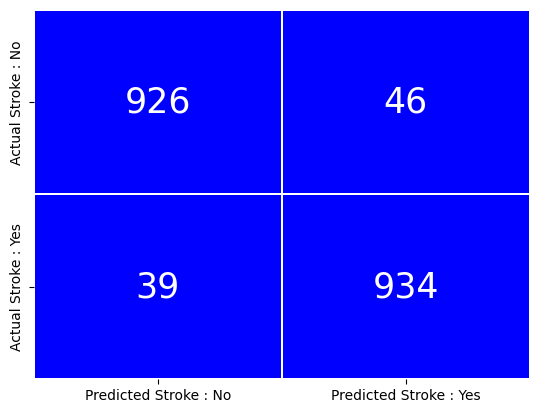

In [703]:
# type your code here

cm =confusion_matrix(y_true=y_test_sm,y_pred=y_pred_tuned)

conf_matrix_xgb = pd.DataFrame(data=cm,columns=['Predicted Stroke : No','Predicted Stroke : Yes'],
                             index=['Actual Stroke : No','Actual Stroke : Yes'])
sns.heatmap(data=conf_matrix_xgb,annot=True,fmt='d',cmap=ListedColormap(['blue']),linewidths=0.2,cbar=False,
            annot_kws={'size':25})

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
#Best Param for Random Forest  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 40, 'n_estimators': 150}
# Best Score for Random Forest  0.8564412234454627

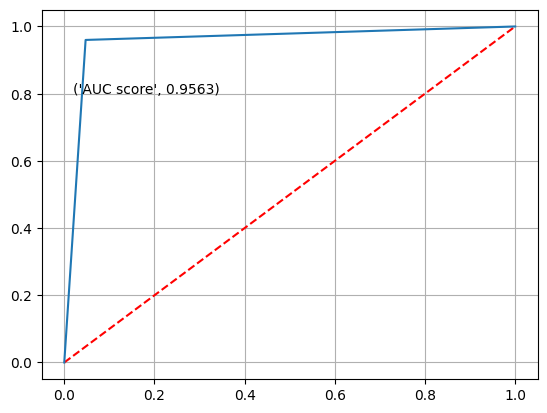

In [704]:
fpr,tpr,thresholds = roc_curve(y_test_sm,y_pred_tuned)

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)

plt.text(x=0.02,y=0.8,s=('AUC score',round(roc_auc_score(y_test_sm,y_pred_tuned),4)))

plt.grid(True)
plt.show()

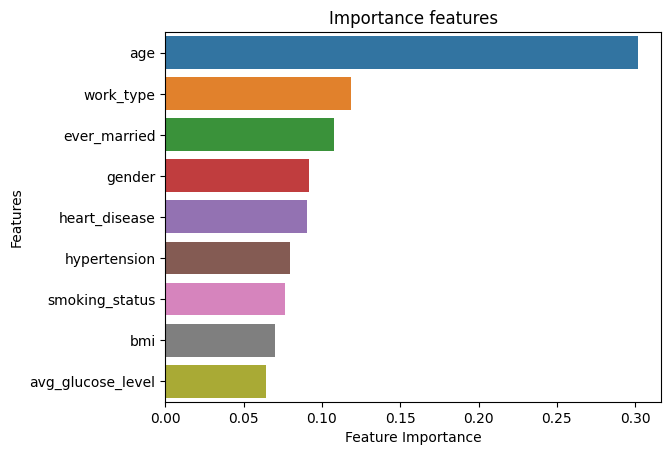

In [705]:
df_feature_importance = pd.DataFrame({'Features':X_train_sm.columns,
                                      'Feature Importance':xgb_boost_tuned.feature_importances_})
df_feature_importance = df_feature_importance.sort_values(by='Feature Importance',ascending=False)
sns.barplot(data=df_feature_importance,x='Feature Importance',y='Features')
plt.title('Importance features')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()